<a href="https://colab.research.google.com/github/MtHenriqueF/GA-Rastrigin-1/blob/configuracoes-diversas/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

WORKDIR = '/content/drive/MyDrive/GA'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/MyDrive/GA


---
# Enunciado

O problema para o segundo trabalho de GA é definido pela função Rastrigin [1] é uma função
não convexa usada como um problema de teste de desempenho para algoritmos de
otimização.

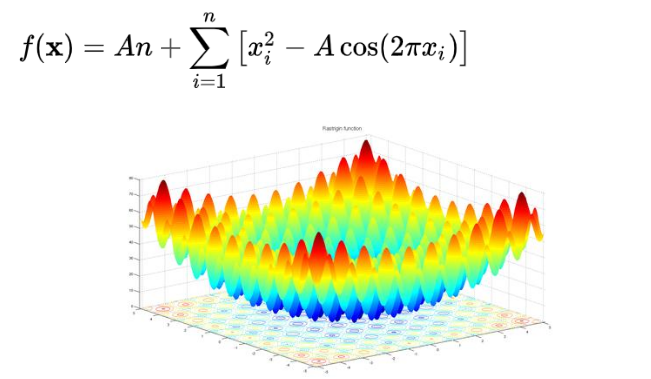

In [ ]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


- **O objetivo é avaliar e testar todos os parâmetros do Algoritmo Genético para encontrar a função de mínimo para o problema no menor tempo possível, ou seja, com a menor quantidade de gerações.** O código em Python desenvolvido a partir da biblioteca *geneticalgorithm2* também está disponível.

- Fundamental, a inclusão de **tabelas que descrevam os parâmetros e valores avaliados desses parâmetros**, além dos resultados obtidos nos testes. Os **gráficos** devem ser anexados para justificar as respostas.

- Também recomendo que não alterem mais de um parâmetro por vez para evitar avaliações indevidas. Fundamental que façam comentários a respeito dos resultados obtidos!

---
# Informações sobre o trabalho

- Biblioteca do trabalho2
[geneticalgorithm2](https://pypi.org/project/geneticalgorithm2)

- Parâmetros do GA
[parametros-ga](https://github.com/PasaOpasen/geneticalgorithm2)


- Informação funções matemáticas
  - https://github.com/PasaOpasen/OptimizationTestFunctions#rastrigin
  - https://github.com/PasaOpasen/geneticalgorithm2

- Outra biblioteca de GA.
https://pypi.org/project/deap/

- Biblioteca que usei para evolução diferencial: [Scipy differencial_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

---
## Estrutura global do algoritmo - segundo biblioteca

```python
# Pre-process: making inner functions depends on params, making/loading start population

while True:

    if reason to stop (time is elapsed / no progress / generation count is reached / min value is reached):
        break


    select parents to crossover from last population and put them to new population:
        select (elit count) best samples
        select (parents count - elit count) random samples (by selection function)

    create (total samples count - parents count) children (samples from selected parents) and put them to new population:
        while not all children are created:
            select 2 random parents
            make child1, child2 from them using crossover
            mutate child1 by mutation (model.mut)
            mutate child2 by middle mutation (model.mut_middle)
            put children to new population
    
    remove duplicates, make revolutions, sort population by scores
    use callbacks, use middle callbacks

# Post-process: plotting results, saving
```

---
# Instalando dependências

In [ ]:
!pip install geneticalgorithm2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install geneticalgorithm2[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=25b5280c3d151e841503f6df2967424c0827bff07b11a09f639eaf5589c2abc1
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


---
# Interpretando enunciado e definindo os parâmetros essenciais

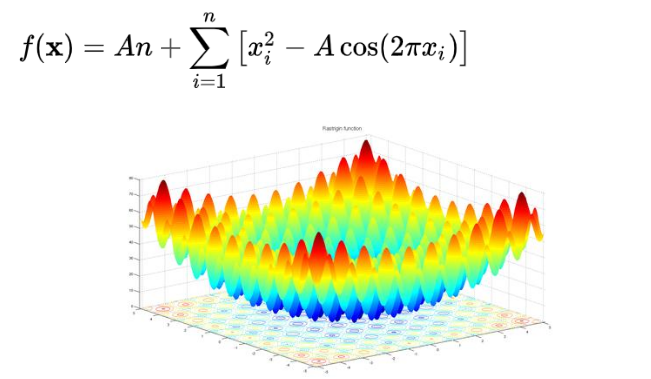

In [ ]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


O enunciado pede para minimizar a funcão e o seu gráfico é 3D e F(x) tem dimensão 1A, então a dimensão de x é 2 ou seja, nossos cromossomos tem 2 'casas' reais.

Com base no enunciado e sabendo que x não tem restrições podemos também escrever a funcão que define a nossa avaliação, que será normalizada e virará aptidao.

O valor padrão e universalmente aceito para o parâmetro A na função de Rastrigin é 10. Portanto podemos definir a funcão de avaliação para nosso problema:


In [ ]:
A = 10
n = 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga

A = 10

def rastrigin_function(X):
    n_dim = len(X)
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n_dim + termo_quadratico - termo_cosseno


Por definição x de [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)
varia entre [-5.12, 5.12] então já podemos definir varbound também


In [ ]:
varbound = np.array([[-5.12, 5.12]] * n)

Além disso, variable_type='real', por definição também.


---
# Exemplificando com 1 experimento

Somento para efeitos de exemplificação da biblioteca geneticalgorithm2 para 1 experimento.

Iniciando o Algoritmo Genético...

Set: Average time of function evaluating (secs): 2.6644468307495116e-05 (total = 0.0053288936614990234)

Best score before optimization: 3.0504783036349856
||__________________ 11.7% GA is running...14 gen from 120...best value = 2.4065875777917327

/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [0.01160057 0.01037749]

 Objective function:
 0.04804430379383007

 Used generations: 120
 Used time: 1.72 seconds


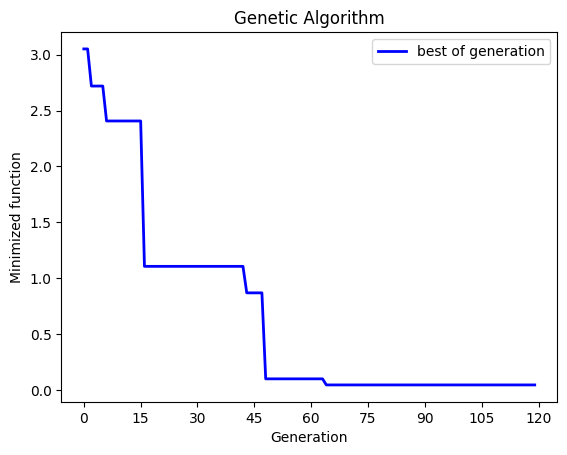

GAResult(last_generation=Generation(variables=array([[ 1.16005722e-02,  1.03774948e-02],
       [-2.01720670e-02,  5.17939066e-03],
       [ 2.06668582e-02,  9.11739487e-03],
       [-2.01720670e-02,  1.04717367e-02],
       [-2.42729140e-02, -1.22702400e-02],
       [-2.01720670e-02, -2.58883974e-02],
       [-2.01720670e-02,  3.62948407e-02],
       [ 1.16005722e-02,  4.40235272e-02],
       [ 4.18304608e-02, -2.58883974e-02],
       [-2.01720670e-02, -5.20374988e-02],
       [ 5.66197698e-02,  5.17939066e-03],
       [-5.90825501e-02,  1.03774948e-02],
       [-5.52342744e-02, -2.58883974e-02],
       [ 5.57547941e-02,  3.62948407e-02],
       [-3.75897163e-03, -9.97655232e-01],
       [ 1.00052925e+00,  5.17939066e-03],
       [ 1.00779323e+00,  1.03774948e-02],
       [ 6.40171570e-02,  3.62948407e-02],
       [-5.90825501e-02,  4.40235272e-02],
       [-2.01720670e-02,  9.92591965e-01],
       [-9.88278448e-01, -2.03548005e-02],
       [-2.01720670e-02, -1.00766352e+00],
       [

In [ ]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from geneticalgorithm2 import Selection

A = 10
n = 2

varbound = np.array([[-5.12, 5.12]] * n)

# CONFIGURAÇÃO DOS PARÂMETROS DO ALGORITMO GENÉTICO

algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

model = ga(
    dimension=n,
    variable_type='real',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param,
    function=rastrigin_function
)

#Executando o algoritmo genético
#O parâmetro para remover duplicatas é passado no método run()

print("Iniciando o Algoritmo Genético...")
model.run(
    remove_duplicates_generation_step=1 #Remove duplicatas a cada 1 geração ("Sem duplicatas")
)



### valor de $(x, y, f(x,y))$ para melhor solução

In [ ]:

solution = model.result

print(f"Melhor Score (Valor da Função): {solution.score}")
print(f"Melhor Solução (Vetor X): {solution.variable}")


Melhor Score (Valor da Função): 0.04804430379383007
Melhor Solução (Vetor X): [0.01160057 0.01037749]


### Solução para cada geração e o melhor resultado

In [ ]:
solution

GAResult(last_generation=Generation(variables=array([[ 1.16005722e-02,  1.03774948e-02],
       [-2.01720670e-02,  5.17939066e-03],
       [ 2.06668582e-02,  9.11739487e-03],
       [-2.01720670e-02,  1.04717367e-02],
       [-2.42729140e-02, -1.22702400e-02],
       [-2.01720670e-02, -2.58883974e-02],
       [-2.01720670e-02,  3.62948407e-02],
       [ 1.16005722e-02,  4.40235272e-02],
       [ 4.18304608e-02, -2.58883974e-02],
       [-2.01720670e-02, -5.20374988e-02],
       [ 5.66197698e-02,  5.17939066e-03],
       [-5.90825501e-02,  1.03774948e-02],
       [-5.52342744e-02, -2.58883974e-02],
       [ 5.57547941e-02,  3.62948407e-02],
       [-3.75897163e-03, -9.97655232e-01],
       [ 1.00052925e+00,  5.17939066e-03],
       [ 1.00779323e+00,  1.03774948e-02],
       [ 6.40171570e-02,  3.62948407e-02],
       [-5.90825501e-02,  4.40235272e-02],
       [-2.01720670e-02,  9.92591965e-01],
       [-9.88278448e-01, -2.03548005e-02],
       [-2.01720670e-02, -1.00766352e+00],
       [

---
# Generalizando o algoritmo genético para n experimentos

Para n experimento o essencial é descobrir o melhor de cada geração de cada experimento, com isso conseguimos decidir qual hiperparametrização utilizar ao final.

 As funções abaixo serão para criação de gráficos e das tabelas que serão úteis para comparar os hiperparâmetros

A funcão abaixo será utilizada nas outras configurações de hiperâparametro também. Ela funciona para generalizar o código retornando um tabela pandas com os melhores indivíduos por geração em cada experimento. Isso será útil para plotar os gráficos e decidir qual configuração usar na hora de podar o número de gerações.

In [ ]:

def executar_experimentos(algorithm_param, n_dim, num_experimentos=25):
    """
    Executa o Algoritmo Genético várias vezes e retorna os resultados em uma tabela pandas.
    """
    resultados_dict = {}
    varbound = np.array([[-5.12, 5.12]] * n_dim)

    print(f"Iniciando bateria de {num_experimentos} experimentos com dimensão n={n_dim}...")

    for i in range(1, num_experimentos + 1):

        model = ga(
            dimension=n_dim,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param,
        )

        model.run(
            function=rastrigin_function,
            remove_duplicates_generation_step=1,
            no_plot=True,
            progress_bar_stream=None,
            disable_printing=True
        )

        resultados_dict[f"Experimento_{i}"] = model.report


    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"

    return df_resultados

funcao de plotagem dos gráficos de
1. Média do Melhor Valor de f(x) por Geração
2. Box Plot do Melhor Valor de f(x) por Geração

In [ ]:
def plotar_resultados_experimentos(df_resultados, titulo_experimento):
    """
    Gera dois gráficos (média e box plot) a partir de uma tabela de resultados.

    Args:
        df_resultados (pd.DataFrame): A tabela com gerações nas linhas e experimentos nas colunas.
        titulo_experimento (str): Um título descritivo para a configuração testada.
    """

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

    # --- Gráfico 1: Média do Melhor Valor de f(x) por Geração ---
    media_por_geracao = df_resultados.mean(axis=1)

    ax1.plot(media_por_geracao.index, media_por_geracao.values, marker='o', linestyle='-')
    ax1.set_title('Média do Melhor Valor de f(x) por Geração', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.grid(True)

    # --- Gráfico 2: Box Plot do Melhor Valor de f(x) por Geração ---
    geracoes_para_plotar = df_resultados.iloc[::5, :]

    ax2.boxplot(geracoes_para_plotar.transpose())
    ax2.set_title('Box Plot do Melhor Valor de f(x) (a cada 5 gerações)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)

    ax2.set_xticks(
        ticks=np.arange(1, len(geracoes_para_plotar) + 1),
        labels=geracoes_para_plotar.index,
        rotation=45
    )
    ax2.grid(True, linestyle='--', alpha=0.6)

    fig.suptitle(f'Resultados para o Teste: "{titulo_experimento}"', fontsize=18)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o supertítulo caber
    plt.show()


Função para obter o melhor resultado dos experimentos

In [ ]:
def obter_melhor_resultado_geral(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    melhor_score = ultima_geracao.min()

    melhor_experimento = ultima_geracao.idxmin()

    return {'score': melhor_score, 'experimento': melhor_experimento}

Função para obter a média dos melhores resultados (pegar a última geração de cada experimento e tirar média).

In [ ]:
def calcular_media_resultados_finais(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    media_scores = ultima_geracao.mean()

    desvio_padrao = ultima_geracao.std()

    return {'media': media_scores, 'desvio_padrao': desvio_padrao}

A Função abaixo tem como intuito gerar 2 gráficos de comparação entre os hiperparâmetros, isso será útil para dizer de maneira mais clara quem teve o melhor desempenho.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga


def plotar_comparacao_configuracoes(df_config1, df_config2, label_config1, label_config2):
    """
    Gera gráficos comparando a performance de duas configurações de AG.

    Args:
        df_config1 (pd.DataFrame): Tabela de resultados da primeira configuração.
        df_config2 (pd.DataFrame): Tabela de resultados da segunda configuração.
        label_config1 (str): Rótulo para a primeira configuração (para a legenda).
        label_config2 (str): Rótulo para a segunda configuração (para a legenda).
    """

    media_config1 = df_config1.mean(axis=1)
    media_config2 = df_config2.mean(axis=1)

    # Cria uma figura com 2 subplots (2 linhas, 1 coluna)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 14))

    # --- Gráfico 1: Comparação Completa da Convergência Média ---
    ax1.plot(media_config1.index, media_config1.values, marker='.', linestyle='-', label=label_config1)
    ax1.plot(media_config2.index, media_config2.values, marker='.', linestyle='--', label=label_config2)
    ax1.set_title('Comparação Completa da Convergência Média', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.legend()
    ax1.grid(True)

    # --- Gráfico 2: Comparação da Convergência Final (f(x) < 0.5) ---
    # Encontra a primeira geração em que qualquer uma das configs ficou abaixo de 0.5
    try:
        start1 = media_config1[media_config1 < 0.5].index[0]
    except IndexError:
        start1 = np.inf # Se nunca atingiu, define como infinito
    try:
        start2 = media_config2[media_config2 < 0.5].index[0]
    except IndexError:
        start2 = np.inf

    start_gen = min(start1, start2)

    if start_gen == np.inf:
        ax2.text(0.5, 0.5, 'Nenhuma configuração atingiu f(x) < 0.5',
                 ha='center', va='center', fontsize=14, color='red')
    else:
        zoom_media1 = media_config1[start_gen-1:] # -1 para incluir o ponto de partida
        zoom_media2 = media_config2[start_gen-1:]

        ax2.plot(zoom_media1.index, zoom_media1.values, marker='o', linestyle='-', label=label_config1)
        ax2.plot(zoom_media2.index, zoom_media2.values, marker='x', linestyle='--', label=label_config2)

    ax2.set_title('Comparação da Convergência Final (Zoom em f(x) < 0.5)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



A função abaixo compara os boxplot's de 2 algoritmos GA.

In [ ]:
# Adicione esta importação no início do seu script
import seaborn as sns

def plotar_boxplot_comparativo(df_config1, df_config2, label_config1, label_config2):
    """
    Gera um único gráfico de boxplot comparando duas configurações de AG.

    Args:
        df_config1 (pd.DataFrame): Tabela de resultados da primeira configuração.
        df_config2 (pd.DataFrame): Tabela de resultados da segunda configuração.
        label_config1 (str): Rótulo para a primeira configuração.
        label_config2 (str): Rótulo para a segunda configuração.
    """

    print("Reorganizando dados para o boxplot comparativo...")

    # --- Passo 1: Selecionar e preparar os dados de cada configuração ---
    # Selecionamos a cada 10 gerações para o gráfico não ficar muito cheio
    dados_c1 = df_config1.iloc[::10, :].reset_index()
    dados_c2 = df_config2.iloc[::10, :].reset_index()

    # "Derretemos" (melt) a tabela para o formato longo
    dados_c1_longo = dados_c1.melt(id_vars=['Geração'], var_name='Experimento', value_name='Valor_f(x)')
    dados_c2_longo = dados_c2.melt(id_vars=['Geração'], var_name='Experimento', value_name='Valor_f(x)')

    # Adicionamos a coluna que identifica a configuração
    dados_c1_longo['Configuração'] = label_config1
    dados_c2_longo['Configuração'] = label_config2

    # --- Passo 2: Combinar tudo em um único DataFrame ---
    df_combinado = pd.concat([dados_c1_longo, dados_c2_longo])

    # --- Passo 3: Gerar o Gráfico com Seaborn ---
    print("Gerando o gráfico de Box Plot comparativo...")
    plt.figure(figsize=(18, 9))

    # O parâmetro 'hue' é o que cria os boxplots lado a lado para comparação
    sns.boxplot(
        data=df_combinado,
        x='Geração',
        y='Valor_f(x)',
        hue='Configuração'
    )

    plt.title('Comparação de Box Plots do Melhor Valor de f(x) por Geração', fontsize=16)
    plt.xlabel('Geração', fontsize=12)
    plt.ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Configuração')
    plt.tight_layout()
    plt.show()

---
# Algoritmo genético - **configuração 1** (Configuração inicial)
Será utilizado a configuração inicial dos hiperparâmetros do GA:
```python
algorithm_param = {
    'max_num_iteration': 170,                #Número de gerações
    'population_size': 300,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

# A remoção de duplicatas está incluída também porém se encontra em model.run()
```
Ela poderá sofrer alterações caso alguma outra configuração seja melhor.
Será usado 25 experimentos

Configuração 1 de hiperparâmetros:

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg1 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
    'crossover_probability': 0.65
}




#### Tabela resultados

In [ ]:
tabela_resultados_cfg1 = executar_experimentos(
    algorithm_param=algorithm_param_cfg1,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


In [ ]:
tabela_resultados_cfg1

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,4.985166,1.769375,1.098191,2.450664,1.773603,4.659969,2.689764,3.060951,3.577524,3.450422,...,4.752102,6.375807,4.601478,1.080599,3.567343,1.492549,5.514399,1.116294,5.005049,1.769323
2,2.997986,1.769375,1.098191,2.450664,1.773603,4.659969,1.021497,3.060951,1.282616,3.450422,...,4.752102,3.489019,4.601478,1.080599,3.567343,1.492549,2.713485,1.116294,5.005049,1.769323
3,2.997986,1.769375,1.098191,2.450664,1.773603,2.619292,1.021497,3.059655,1.282616,2.101365,...,4.752102,3.489019,4.601478,1.080599,3.567343,1.492549,2.713485,1.116294,1.080207,1.769323
4,2.960108,0.155922,1.098191,2.450664,1.773603,2.619292,1.021497,3.059655,1.282616,2.101365,...,2.588824,3.489019,4.601478,1.080599,3.567343,1.492549,2.713485,1.116294,1.080207,1.769323
5,2.960108,0.155922,1.098191,2.450664,1.773603,2.619292,1.021497,3.059655,1.282616,1.496283,...,2.588824,3.489019,2.645505,1.080599,3.567343,0.390914,2.099133,1.116294,1.080207,1.769323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.000151,0.039546,0.001046,0.006274,0.011252,0.000121,0.002705,0.001231,0.009579,0.001337,...,0.000070,0.010758,0.004036,0.011006,0.000894,0.000269,0.009494,0.135314,0.026216,0.046861
167,0.000151,0.039546,0.001046,0.006274,0.011252,0.000121,0.002705,0.001231,0.009579,0.001337,...,0.000070,0.010758,0.004036,0.011006,0.000894,0.000269,0.009494,0.135314,0.026216,0.046861
168,0.000151,0.039546,0.001046,0.006274,0.011252,0.000121,0.002705,0.001231,0.009579,0.001337,...,0.000070,0.010758,0.004036,0.011006,0.000894,0.000269,0.009494,0.127645,0.026216,0.046861


### Gráficos de resultados

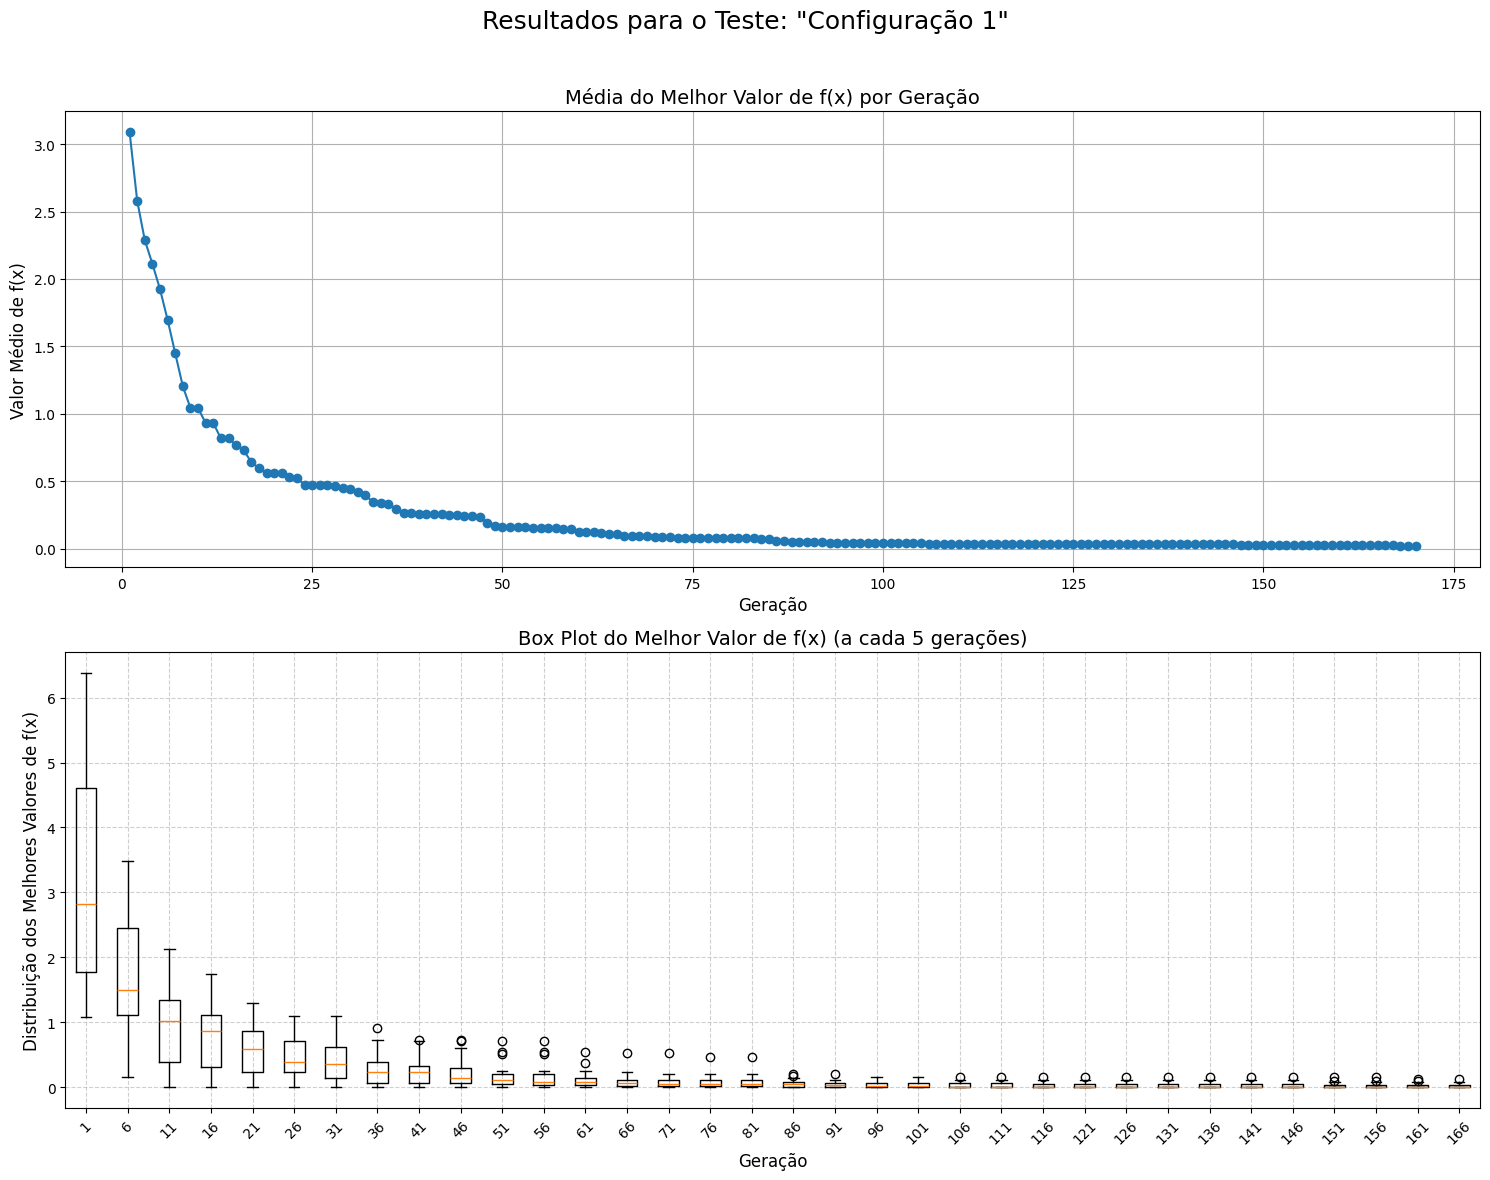

In [ ]:

plotar_resultados_experimentos(tabela_resultados_cfg1, "Configuração 1")


#### Melhor indivíduo e média

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 7.027445337115523e-05, 'experimento': 'Experimento_16'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.018198363487374393),
 'desvio_padrao': 0.029839993642842434}

---
# Algoritmo genético - **configuração 2**

Foi alterado em relação à primeira configuração o modo de seleção para roulette obs: ele nao permite alterar a
normalização, a biblioteca já aplica uma normalização padrão que não tem como altera-la.


In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg2 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'roulette',
}





###Tabela de resultados

In [ ]:
tabela_resultados_cfg2 = executar_experimentos(
    algorithm_param=algorithm_param_cfg2,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
tabela_resultados_cfg2

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,2.778260,4.868317,1.118616,1.212250,2.805028,1.573374,2.825781,0.016844,1.920592,2.562581,...,5.729888,1.050267,0.474797,1.606460,2.219014,4.755242,2.675024,1.819031,3.875275,5.661454
2,2.620256,4.868317,1.118616,1.212250,2.805028,1.573374,2.825781,0.016844,1.920592,1.737157,...,3.237845,1.050267,0.474797,1.606460,2.219014,4.755242,2.675024,1.819031,3.875275,3.711379
3,2.174844,4.868317,1.118616,1.212250,2.805028,1.573374,2.825781,0.016844,1.920592,1.737157,...,3.227508,1.050267,0.474797,1.606460,2.219014,1.801872,2.675024,1.819031,3.875275,3.711379
4,2.174844,4.868317,1.118616,1.212250,2.053892,1.573374,2.825781,0.016844,1.920592,1.737157,...,3.227508,1.050267,0.474797,1.606460,2.219014,1.801872,2.049902,1.819031,3.875275,1.575516
5,2.174844,4.839367,1.118616,1.212250,0.773215,1.573374,2.825781,0.016844,1.920592,1.737157,...,3.227508,1.050267,0.474797,1.606460,2.219014,1.801872,2.049902,1.819031,3.875275,1.575516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.096933,0.021971,0.011604,0.001694,0.039809,0.011258,0.021139,0.016844,0.010340,0.054530,...,0.040992,0.012985,0.031271,0.011891,0.016247,0.120584,0.028342,0.007425,0.186764,0.037832
167,0.096933,0.021971,0.011604,0.001694,0.039809,0.011258,0.021139,0.016844,0.010340,0.054530,...,0.040992,0.012985,0.031271,0.011891,0.016247,0.120584,0.028342,0.007425,0.186764,0.037832
168,0.096933,0.021971,0.011604,0.001694,0.039809,0.011258,0.021139,0.016844,0.010340,0.054530,...,0.040992,0.012985,0.031271,0.011891,0.016247,0.120584,0.028342,0.007425,0.186764,0.037832


### Gráficos do resultado do GA com roleta (configuração 2)

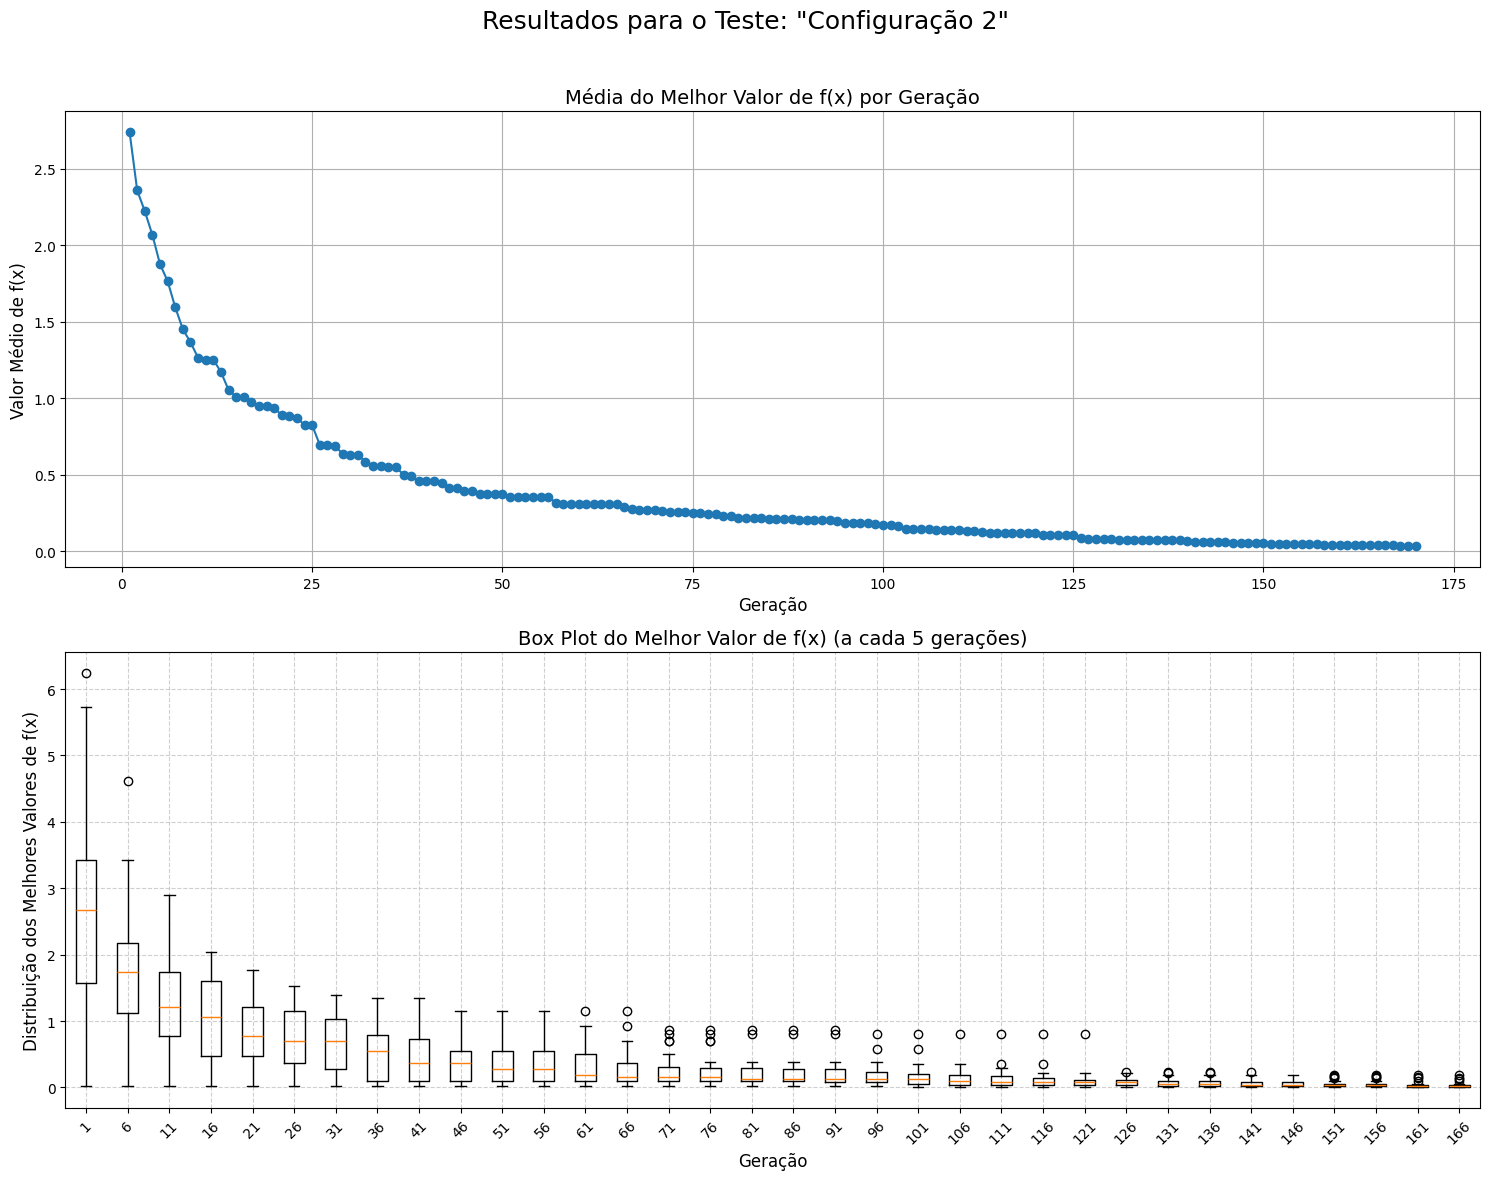

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg2, "Configuração 2")

### Gráficos comparando a Configuração 1 (torneio) com a Configuração 2 (roleta).

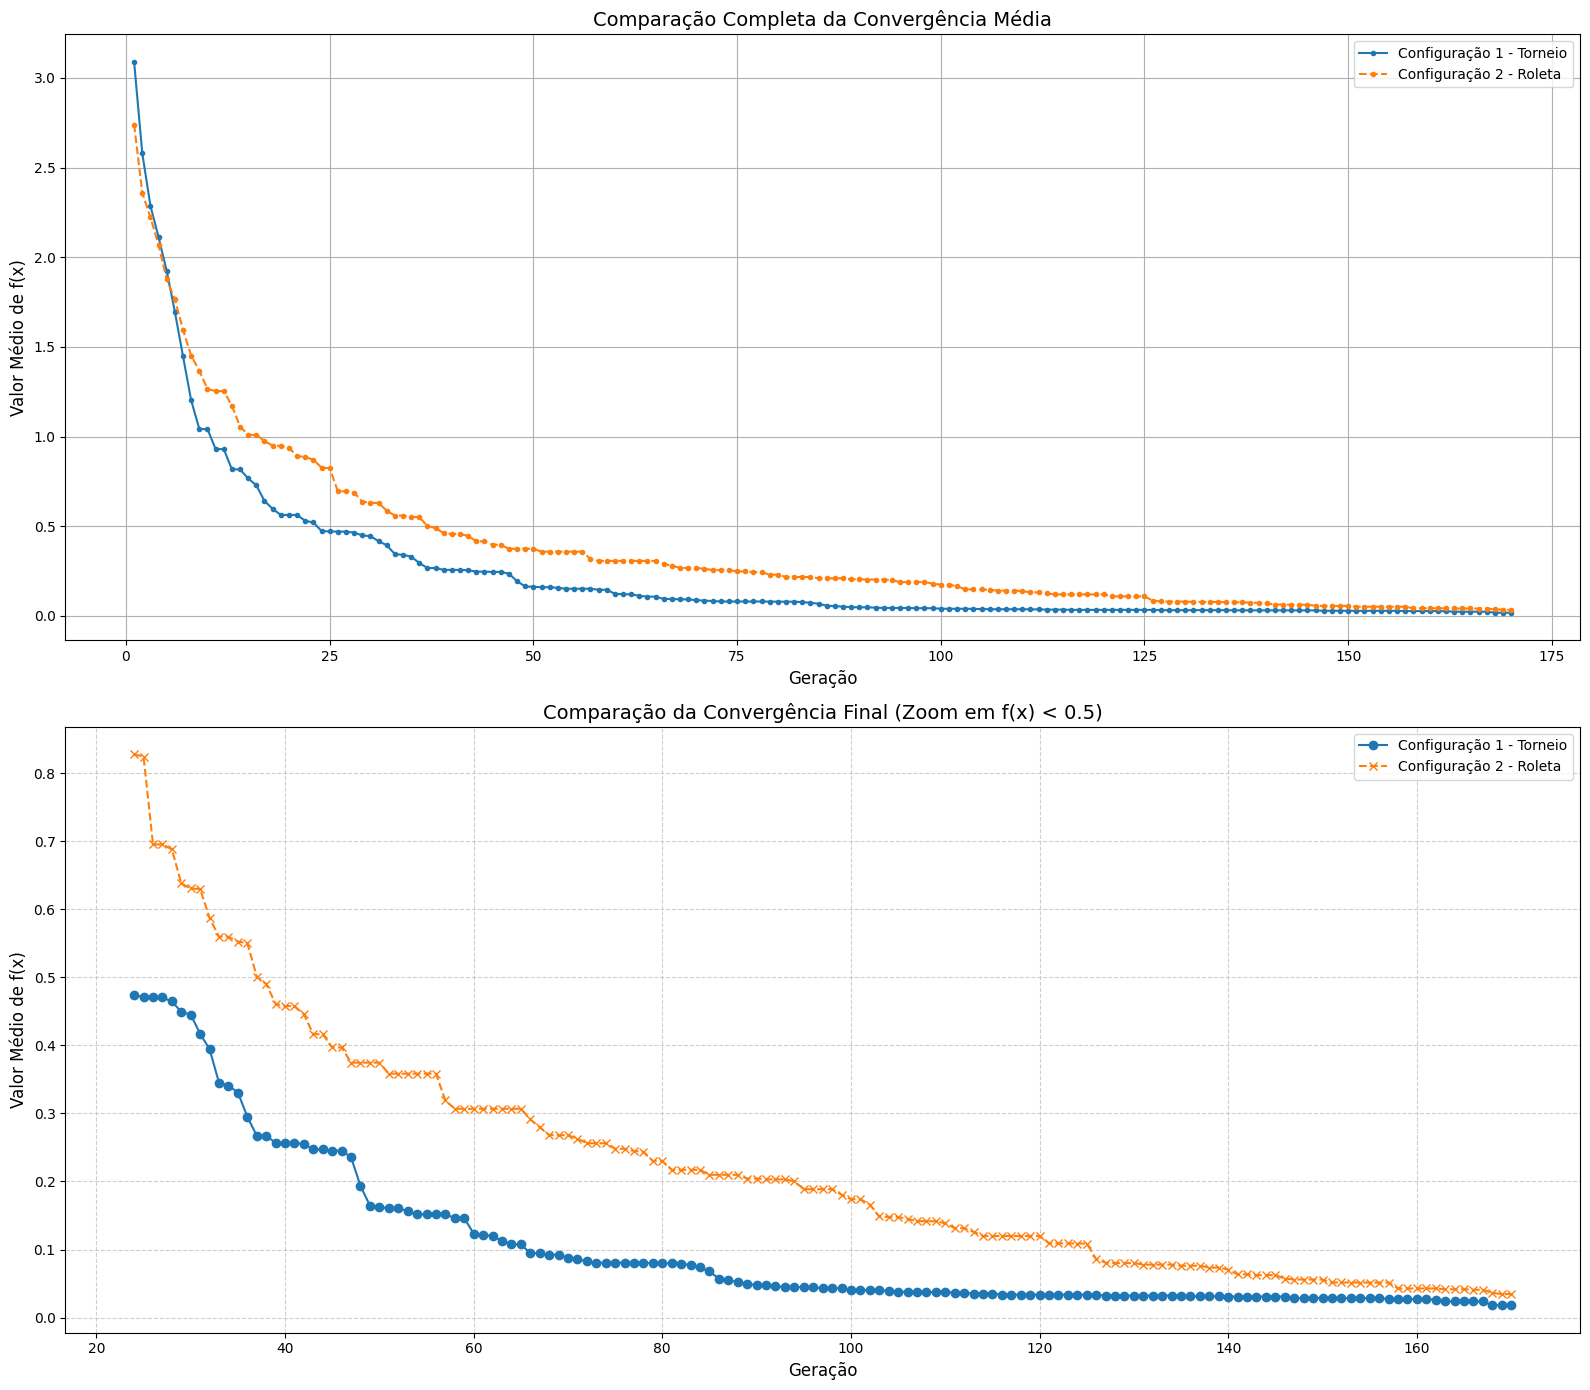

In [ ]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg2,
    label_config1='Configuração 1 - Torneio',
    label_config2='Configuração 2 - Roleta'
)

Comparando a segunda configuração com a primeira através do gráfico acima vemos que os hiperparâmetros com torneio convergem mais rapidamente e tem valor mais baixo.


Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


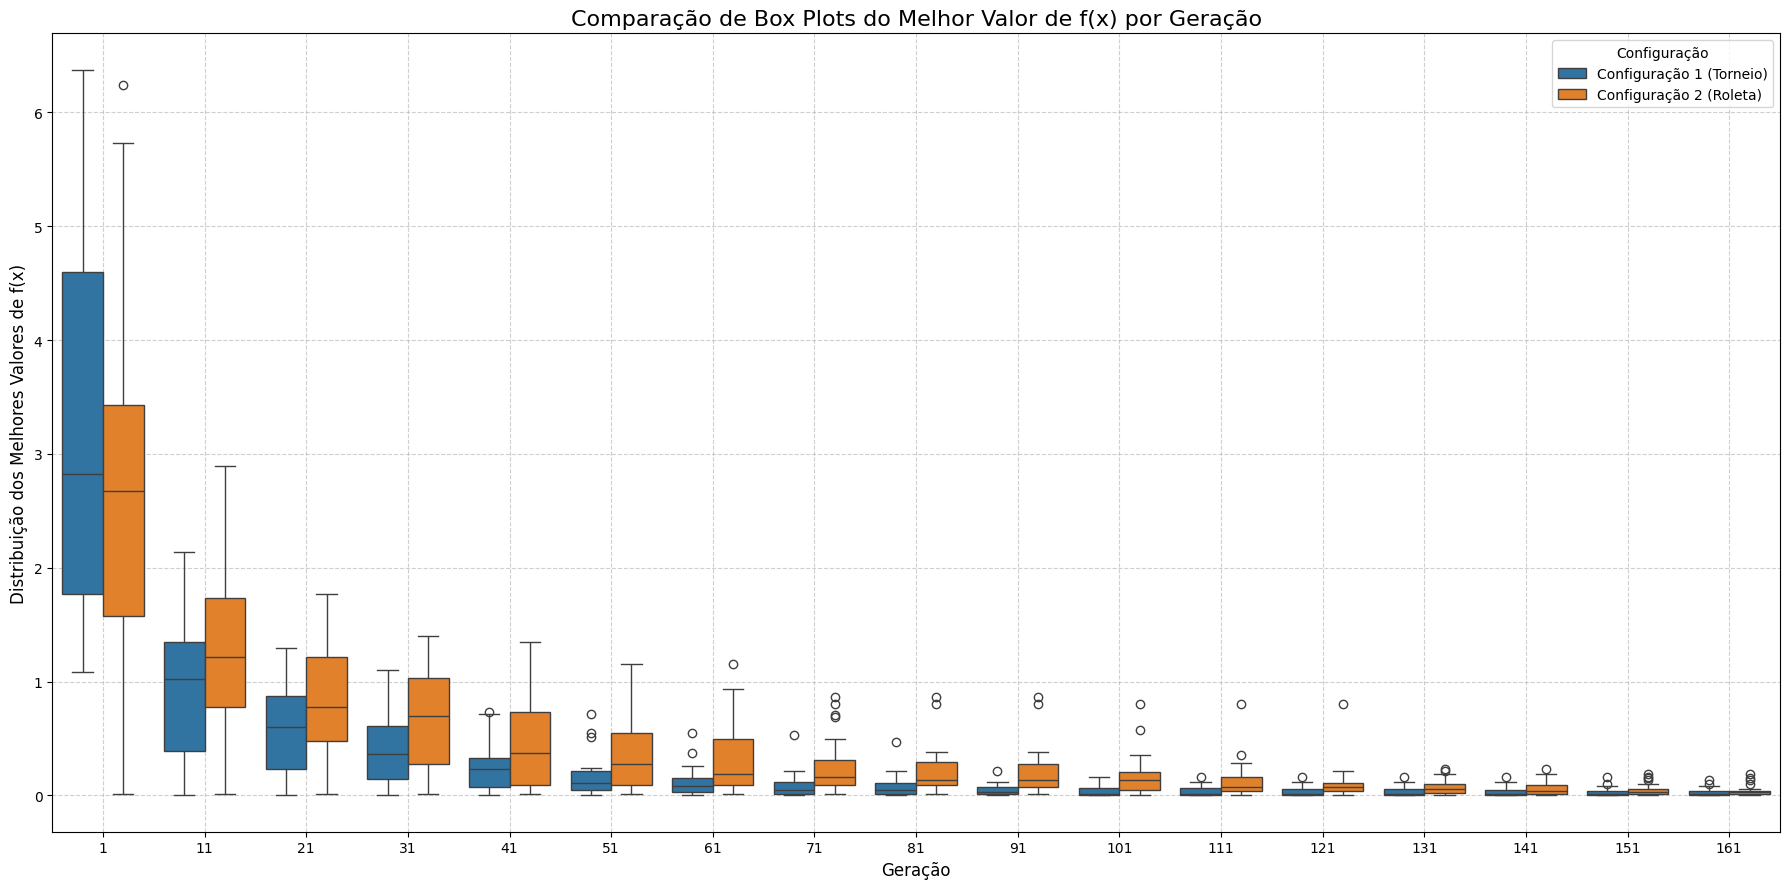

In [ ]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg2,
    label_config1='Configuração 1 (Torneio)',
    label_config2='Configuração 2 (Roleta)'
)


No torneio, as caixas tornam-se muito curtas e achatadas mais rapidamente. Isto significa que a grande maioria das 25 execuções encontrou resultados muito similares e muito bons. O algoritmo é consistente e confiável.

Na roleta, as caixas são mais "altas" por mais tempo. Na indicando uma grande dispersão nos resultados. Alguns experimentos podem ter encontrado uma boa solução, mas outros ainda estavam com scores muito piores. O algoritmo é menos consistente e o resultado é menos previsível.


####Melhor indivíduo, média e desvio padrão

##### Roleta

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg2)

{'score': 0.0013619123034693814, 'experimento': 'Experimento_12'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg2)

{'media': np.float64(0.0344938232224564), 'desvio_padrao': 0.04227437554584066}

##### Torneio

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 7.027445337115523e-05, 'experimento': 'Experimento_16'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.018198363487374393),
 'desvio_padrao': 0.029839993642842434}

#####Em média por experimentos a primeira é ligeramente melhor, além de ser mais consistente possuindo um menor desvio padrão.

###Conclusão sobre qual configuração seguir

Devido à primeira solução com torneio se estabilizar consideravelmente mais rápido e em média ser melhor, seguiremos utilizando ela como efeito de comparação e potencial escolha.

---
# Algoritmo genético - **configuração 3**
Foi alterado em relação à primeira configuração a taxa de mutação de 1 % para 8%

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg3 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08, #ALTERAÇÃO
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament', #Seguiremos com torneio - foi melhor em relacao a roleta
}

###Tabela de resultados

In [ ]:
tabela_resultados_cfg3 = executar_experimentos(
    algorithm_param=algorithm_param_cfg3,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
tabela_resultados_cfg3

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,2.536932,5.212218,2.818454,2.005520,4.082628,2.481251,2.787742,5.159406,1.618128,1.364207,...,3.687360,3.361656,3.712164,5.126269,6.473240,4.932496,5.288659,2.298884,1.648611,0.641479
2,2.536932,5.212218,0.129230,2.005520,2.970078,2.481251,2.787742,5.159406,1.618128,1.364207,...,3.687360,3.361656,2.293059,4.543775,2.489653,4.932496,2.059183,2.298884,1.648611,0.641479
3,2.536932,0.936108,0.129230,2.005520,2.970078,2.179247,2.787742,2.304662,1.618128,1.364207,...,1.972452,3.361656,2.293059,3.615022,2.489653,4.932496,2.059183,2.298884,1.648611,0.641479
4,2.536932,0.936108,0.129230,2.005520,2.970078,2.179247,2.787742,2.144719,1.618128,1.364207,...,1.972452,3.361656,1.672702,1.245655,2.489653,2.164566,1.824122,2.298884,1.648611,0.641479
5,2.536932,0.936108,0.129230,2.005520,2.970078,2.179247,2.197362,2.144719,1.618128,1.364207,...,1.972452,3.030206,1.672702,1.245655,2.489653,2.164566,1.824122,1.645517,1.163804,0.641479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.001654,0.005123,0.002411,0.006167,0.002301,0.041770,0.042077,0.009560,0.053919,0.007498,...,0.026786,0.000722,0.007989,0.038490,0.006198,0.001960,0.051397,0.002582,0.002548,0.005288
167,0.001654,0.005123,0.002411,0.006167,0.002301,0.041770,0.042077,0.009560,0.053919,0.007498,...,0.026786,0.000722,0.007989,0.038490,0.006198,0.001960,0.051397,0.002582,0.002548,0.005288
168,0.001654,0.005123,0.002411,0.006167,0.002301,0.041770,0.042077,0.009560,0.053919,0.007498,...,0.003562,0.000722,0.007989,0.038490,0.006198,0.001960,0.051397,0.002582,0.002548,0.005288


### Gráficos do resultado do GA com 8% de mutação

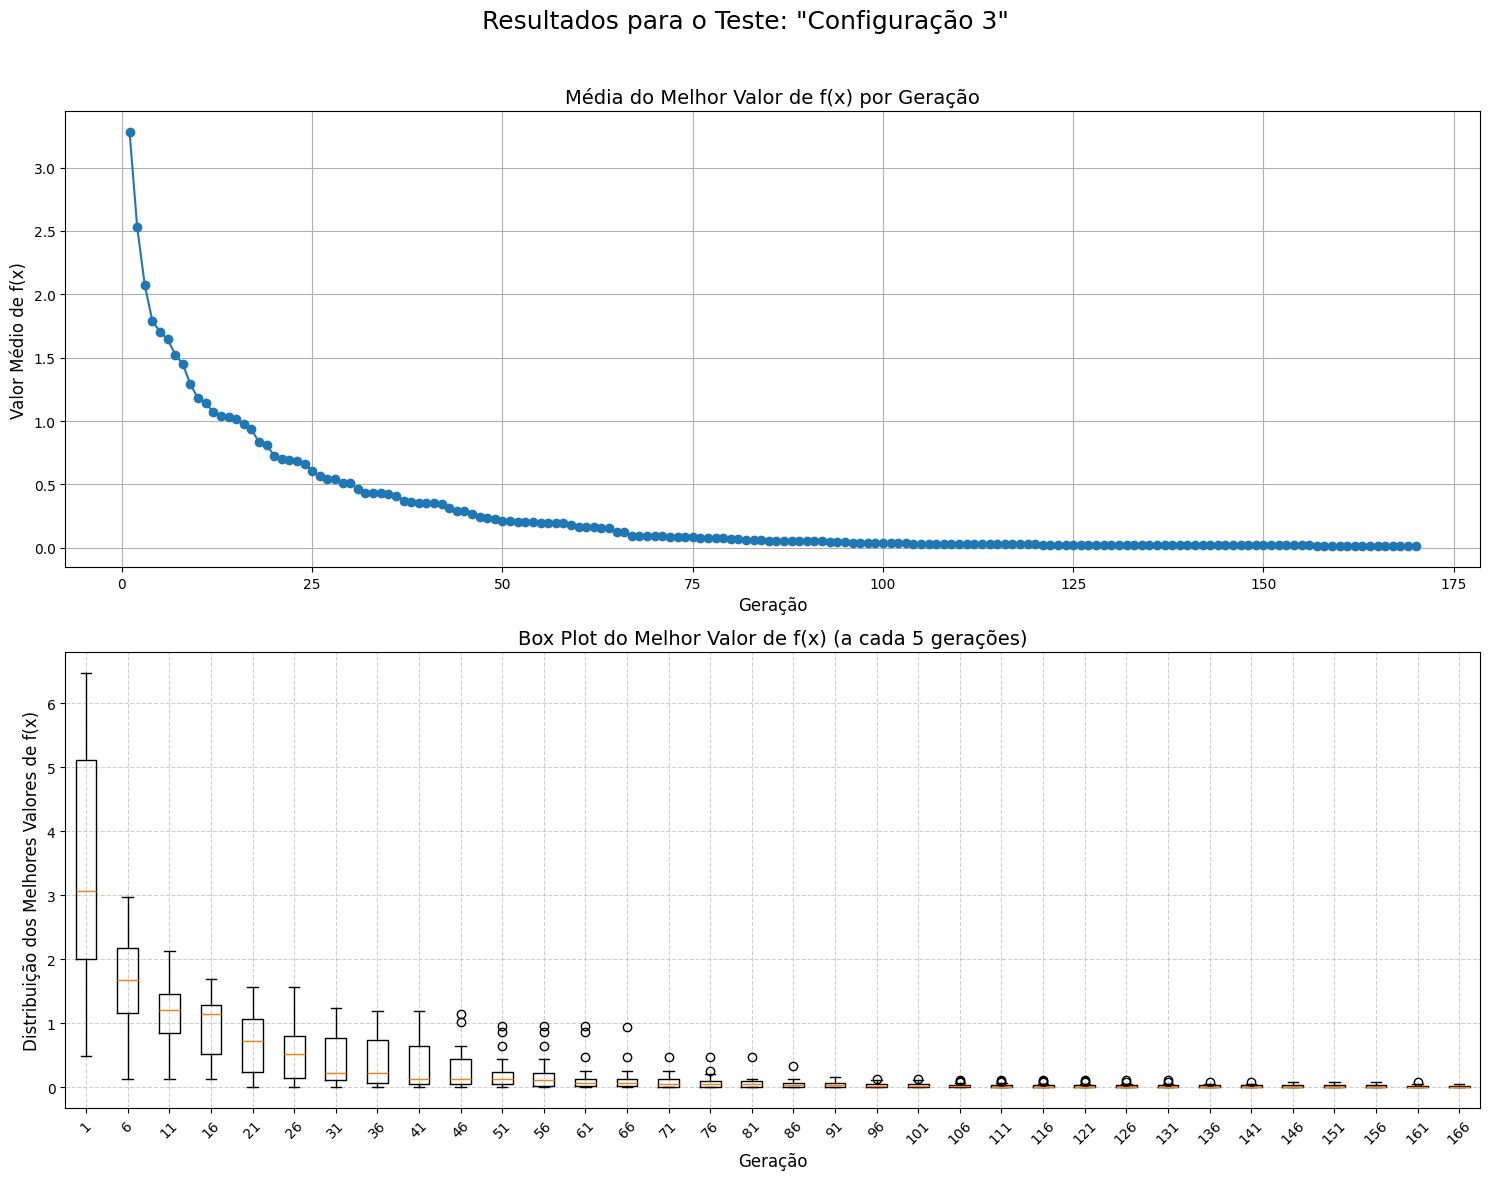

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg3, "Configuração 3")

### Gráficos comparando a Configuração 1 (1% de mutação) com a Configuração 3 (8% de mutação).

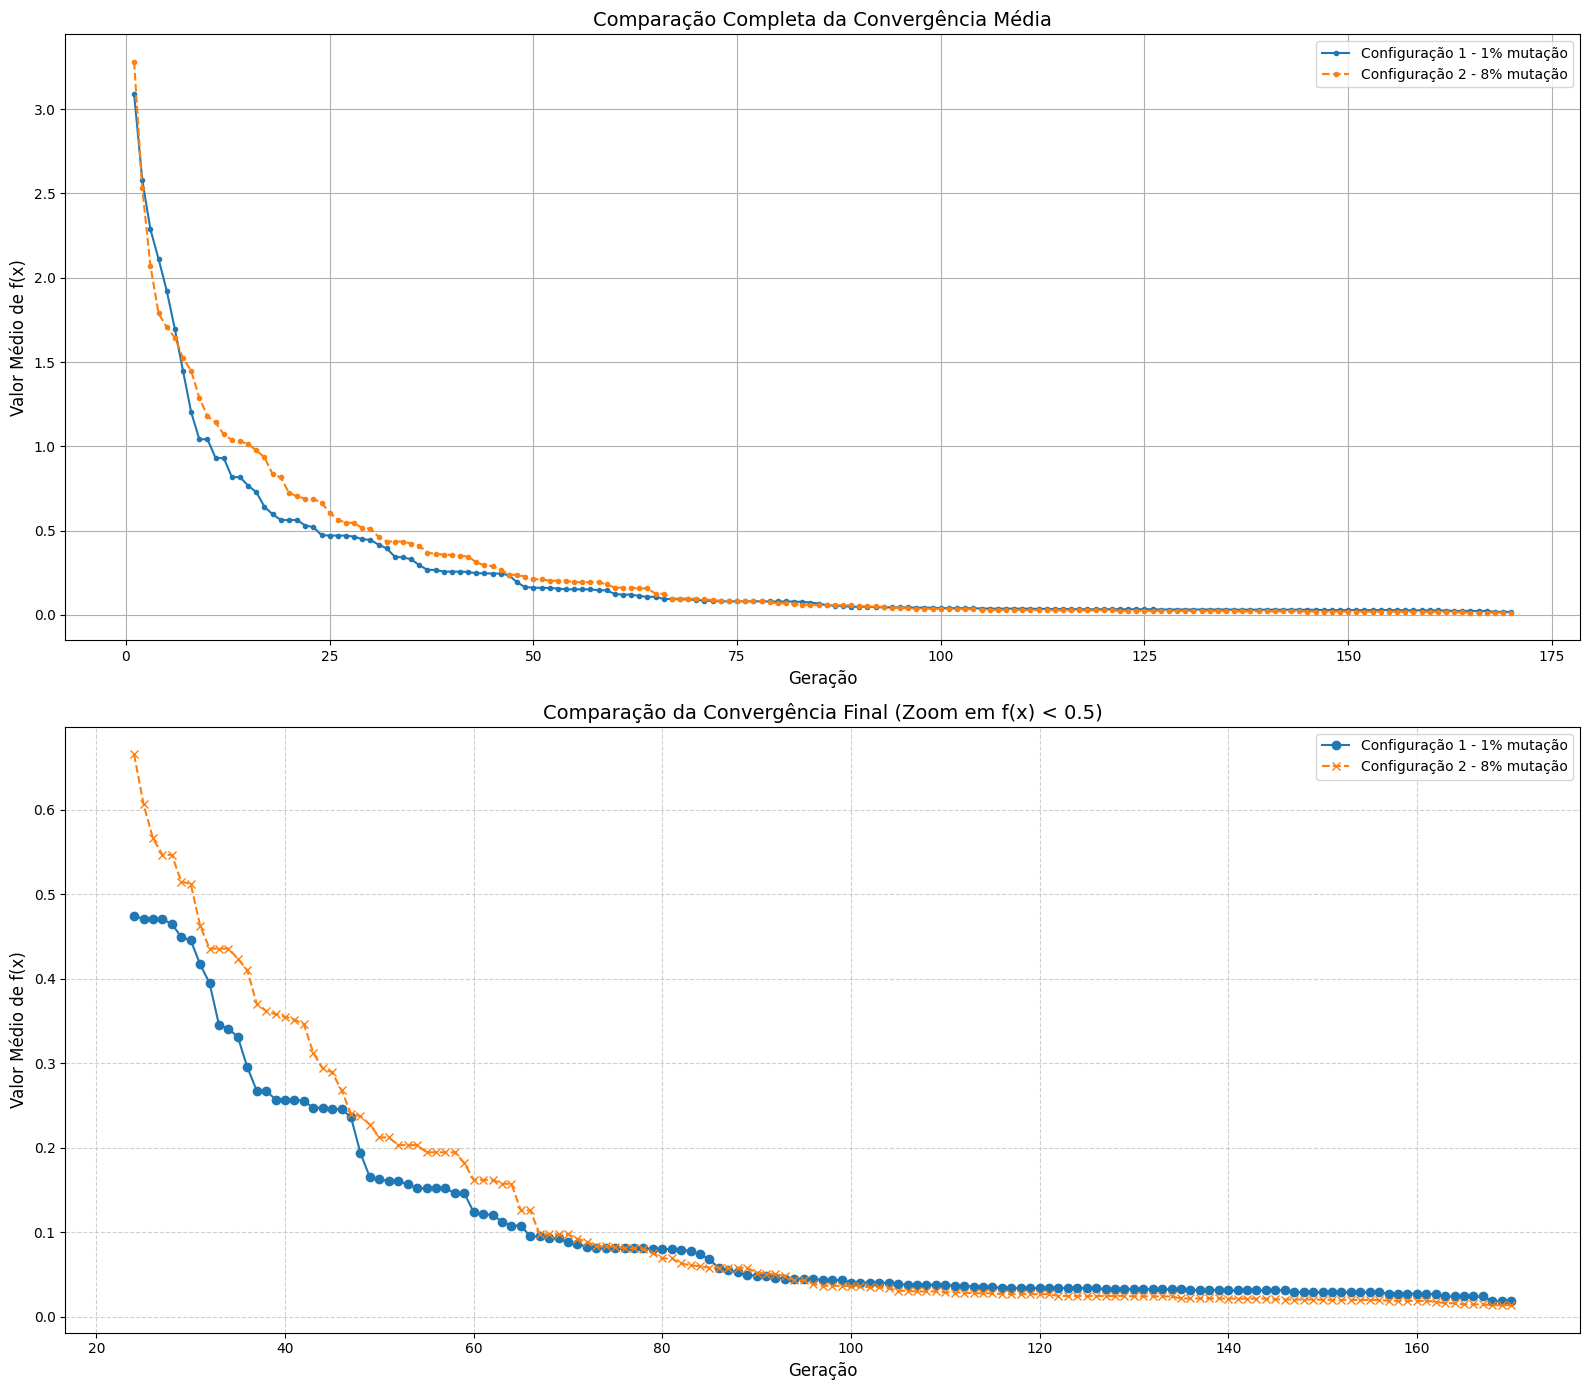

In [ ]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg3,
    label_config1='Configuração 1 - 1% mutação',
    label_config2='Configuração 2 - 8% mutação'
)

1% de mutação teve um início melhor, porém nos ajustes finais a com 8% de mutação teve um desempenho melhor, o que é esperado, pois mutação alta dificulta um super indivíduo.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


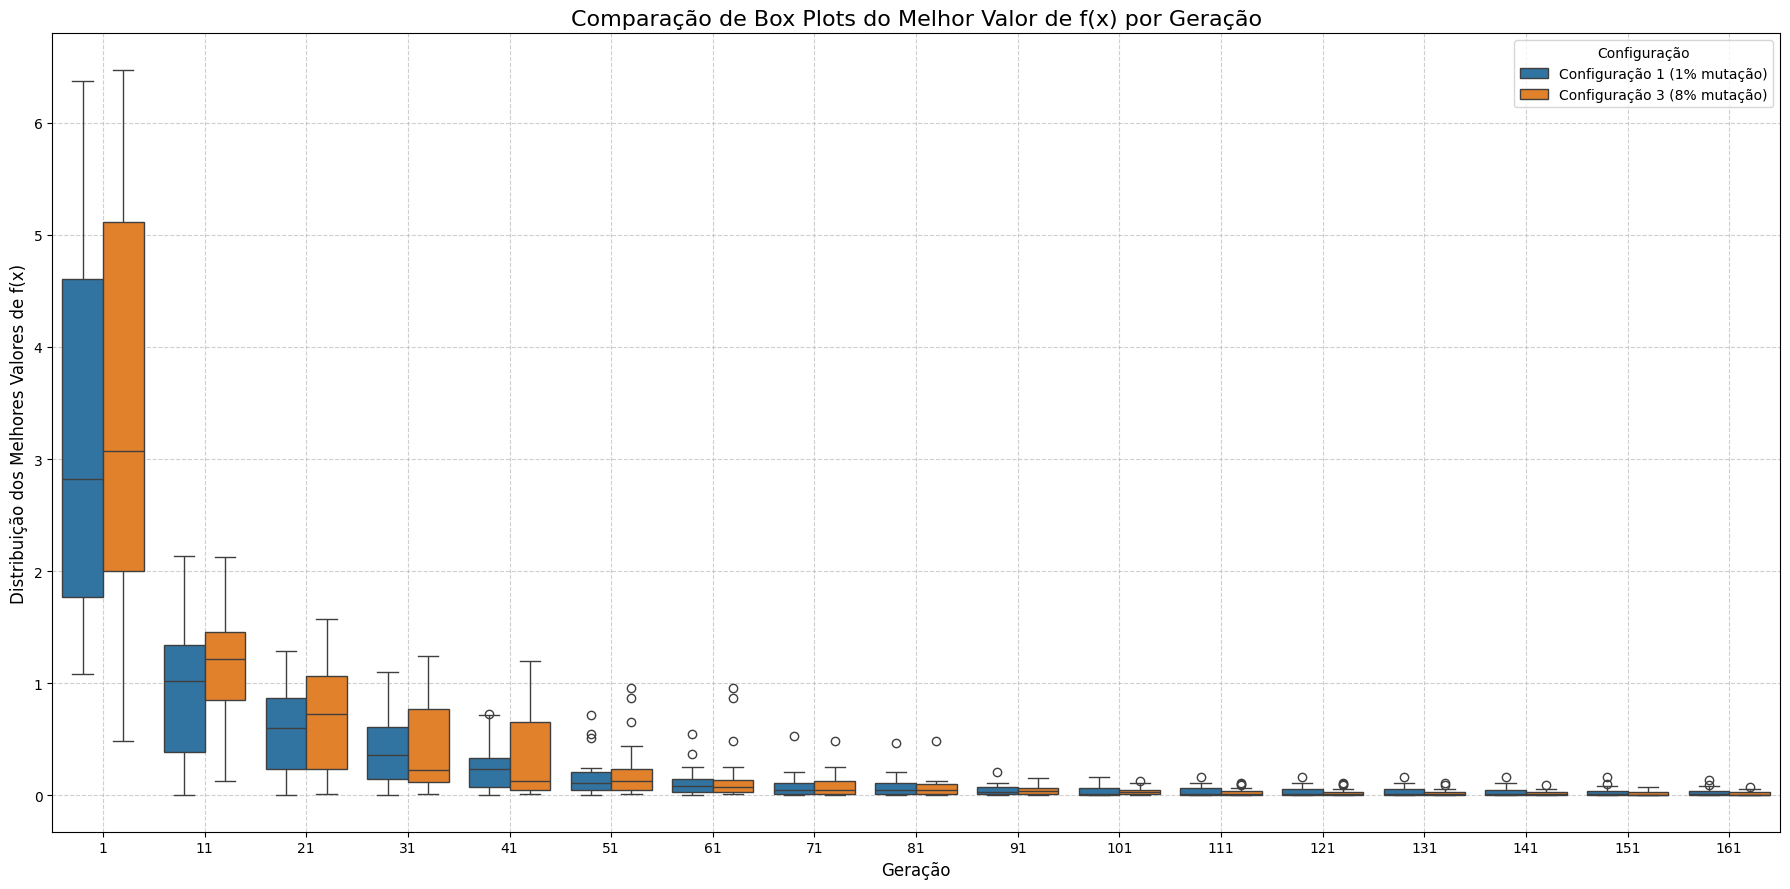

In [ ]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg3,
    label_config1='Configuração 1 (1% mutação)',
    label_config2='Configuração 3 (8% mutação)'
)


A disperção dos dados em 8% começa maior, porém nas etapas finais ele ajusta para um valor menos dispersante.

####Melhor indivíduo, média e desvio padrão

##### 8% mutação

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg3)

{'score': 0.0007216192640946417, 'experimento': 'Experimento_17'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg3)

{'media': np.float64(0.013402039202186699),
 'desvio_padrao': 0.017461766519337868}

##### 1% mutação

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 7.027445337115523e-05, 'experimento': 'Experimento_16'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.018198363487374393),
 'desvio_padrao': 0.029839993642842434}

#####A taxa de mutação de 1% demonstrou um valor médio pior e um desvio padrão maior, gerando uma preferencia pela escolha da mutação com 8%.

### Conclusão

A escolha melhor é a mutação de 8%, mesmo que com 1% de mutação comece melhor, nos ajustes finos 8% se demonstrou significativamente melhor, mesmo pensando na poda essa diferença de desempenho no final tem mais peso.

---
# Algoritmo genético - **configuração 4**
Foi alterado em relação à primeira configuração a taxa de crossover de 65% para 75%.

Foi aumentado taxa de crossover de 65% para 75%

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg4 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08, #Usaremos agora 8% (configuração 3 como efeito de comparação)
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.75, #alteração para 75%
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [ ]:
tabela_resultados_cfg4 = executar_experimentos(
    algorithm_param=algorithm_param_cfg4,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
tabela_resultados_cfg4

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,3.747942,3.195677,2.174454,4.399038,6.449217,1.494149,4.347444,1.417616,5.808710,2.149283,...,2.852338,4.230445,4.830683,4.413311,1.630500,1.571828,4.026319,4.984849,2.628638,4.688251
2,3.747942,2.643191,2.174454,4.399038,6.449217,0.503282,4.168791,1.417616,5.093702,2.149283,...,2.852338,4.230445,4.830683,3.127174,1.630500,1.571828,4.026319,3.064962,2.628638,4.688251
3,3.747942,2.643191,0.244764,4.399038,6.449217,0.503282,4.168791,1.417616,5.093702,2.149283,...,2.611161,3.596306,4.830683,3.127174,1.630500,1.571828,4.026319,3.064962,2.305296,1.990252
4,3.552484,2.643191,0.244764,4.399038,2.319935,0.503282,4.168791,1.342235,2.945514,2.149283,...,2.611161,3.596306,2.207192,3.127174,1.630500,1.571828,3.753453,1.460199,1.599636,1.990252
5,2.244848,2.643191,0.244764,4.399038,1.890184,0.503282,1.535346,1.342235,2.945514,2.149283,...,2.087204,1.381378,1.636440,3.127174,1.382337,1.571828,2.835527,1.460199,1.599636,1.990252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.022416,0.060409,0.017166,0.000854,0.014426,0.001822,0.000013,0.002408,0.002409,0.003322,...,0.006391,0.006789,0.016663,0.017582,0.046844,0.043501,0.002904,0.015149,0.006026,0.001432
167,0.022416,0.060409,0.017166,0.000854,0.014426,0.001822,0.000013,0.002408,0.002409,0.003322,...,0.006391,0.006789,0.016663,0.017582,0.046844,0.043501,0.002904,0.015098,0.006026,0.001432
168,0.022416,0.060409,0.017166,0.000854,0.014426,0.001822,0.000013,0.002408,0.002409,0.003322,...,0.006391,0.006789,0.016663,0.017582,0.046844,0.043501,0.002904,0.015098,0.006026,0.001432


### Gráficos do resultado do GA com crossover 75% (configuração 4)

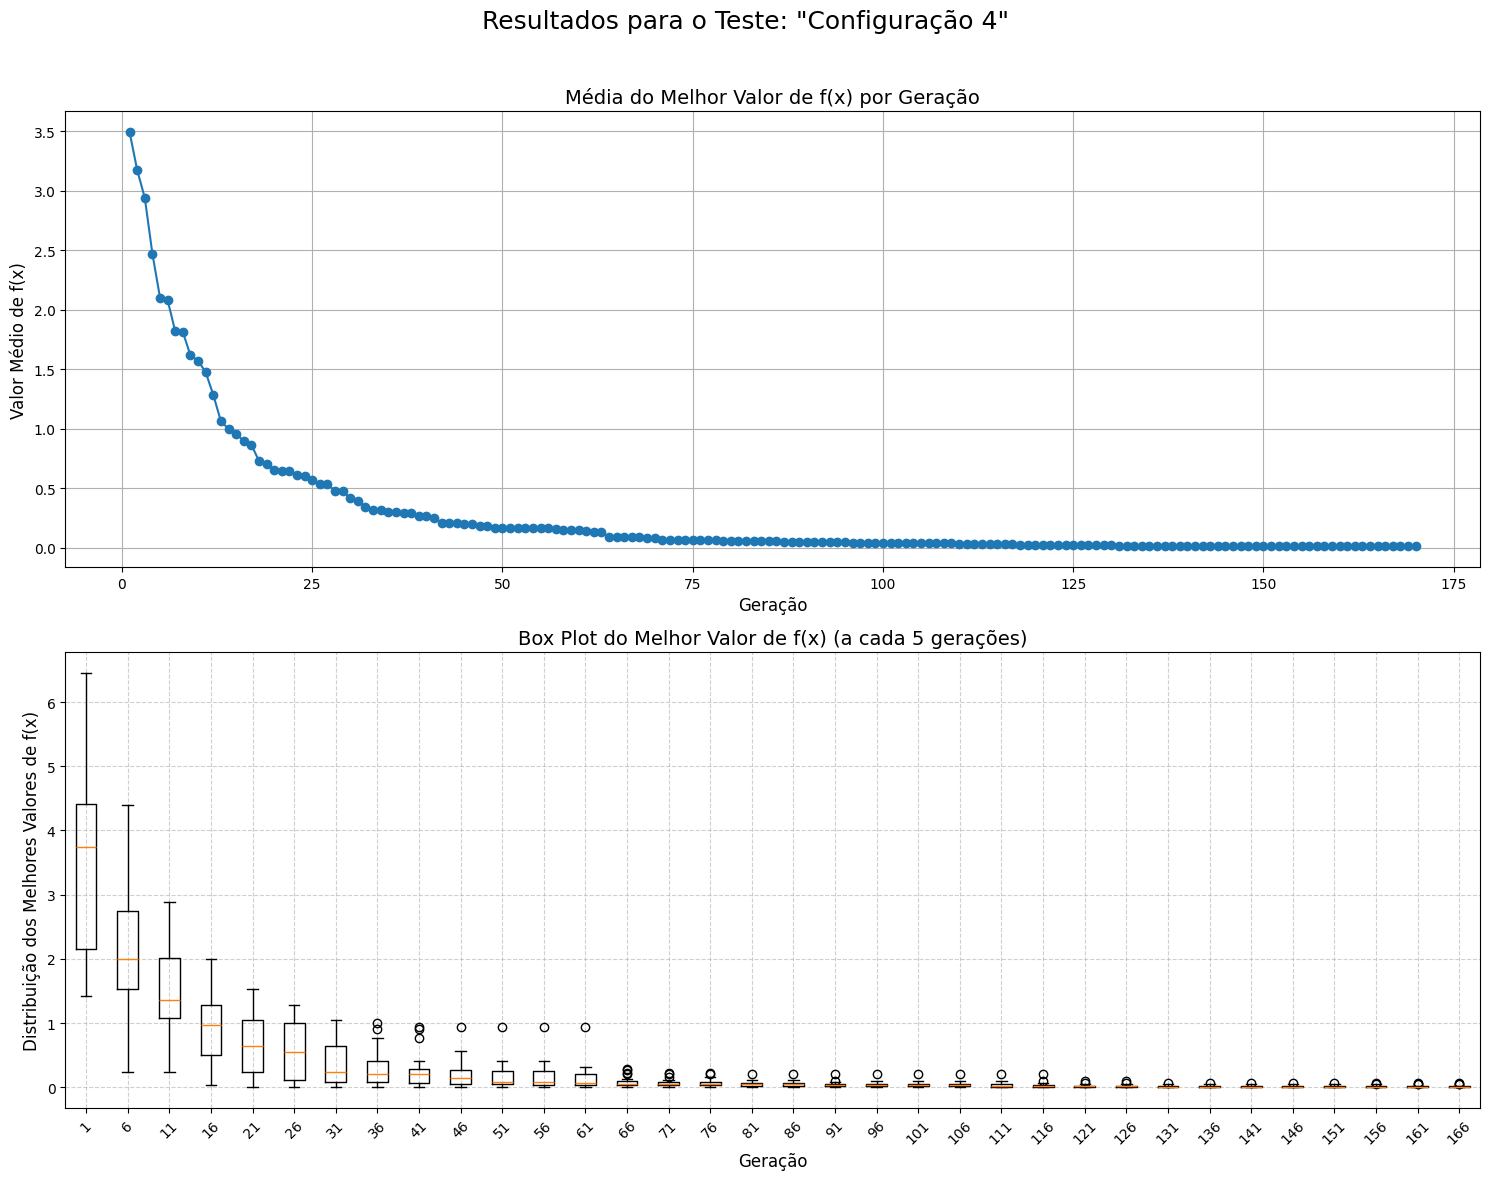

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg4, "Configuração 4")

### Gráficos comparando a Configuração 3 (65% de crossover) com a Configuração 4 (75% de crossover).

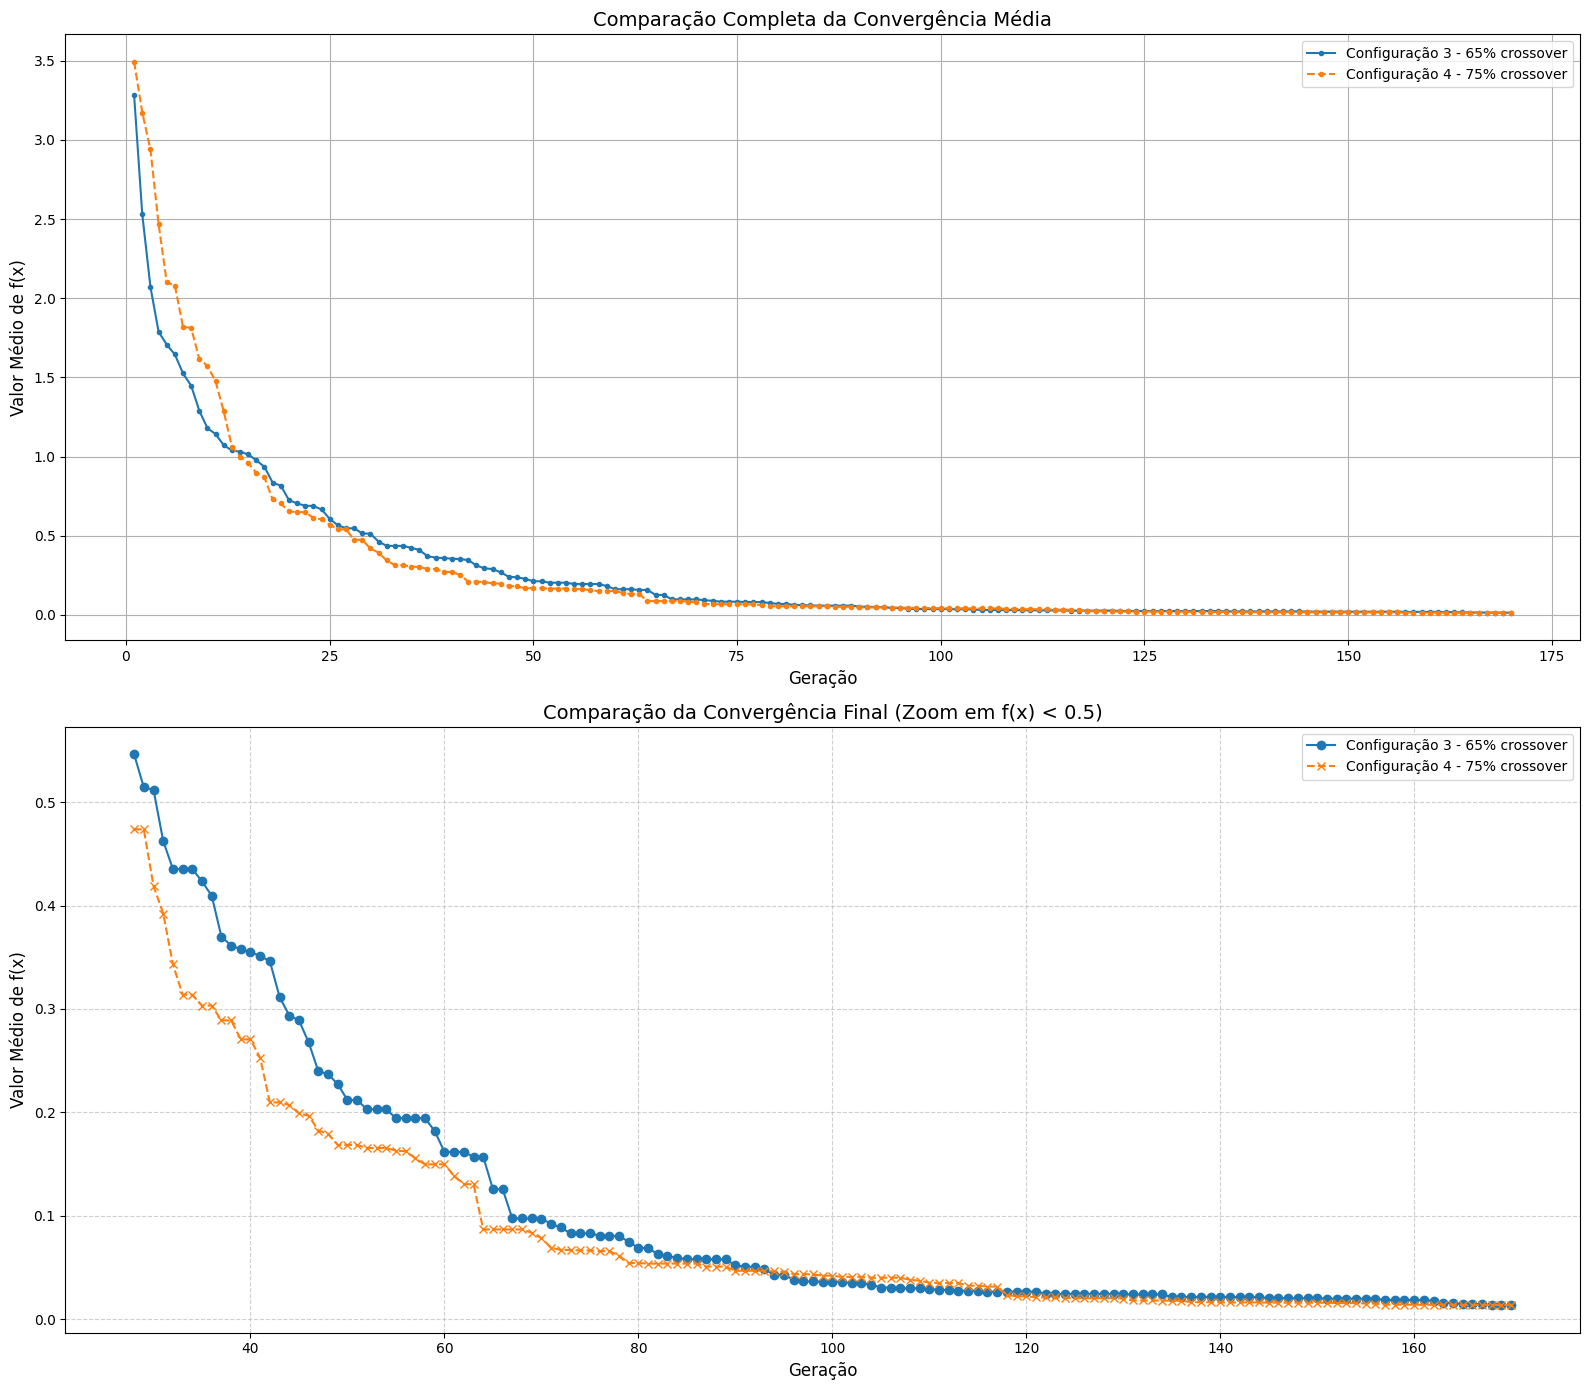

In [ ]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg3,
    df_config2=tabela_resultados_cfg4,
    label_config1='Configuração 3 - 65% crossover',
    label_config2='Configuração 4 - 75% crossover'
)

75% de crossover se manteve melhor em praticamente todas as gerações, principalmente nas finais.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


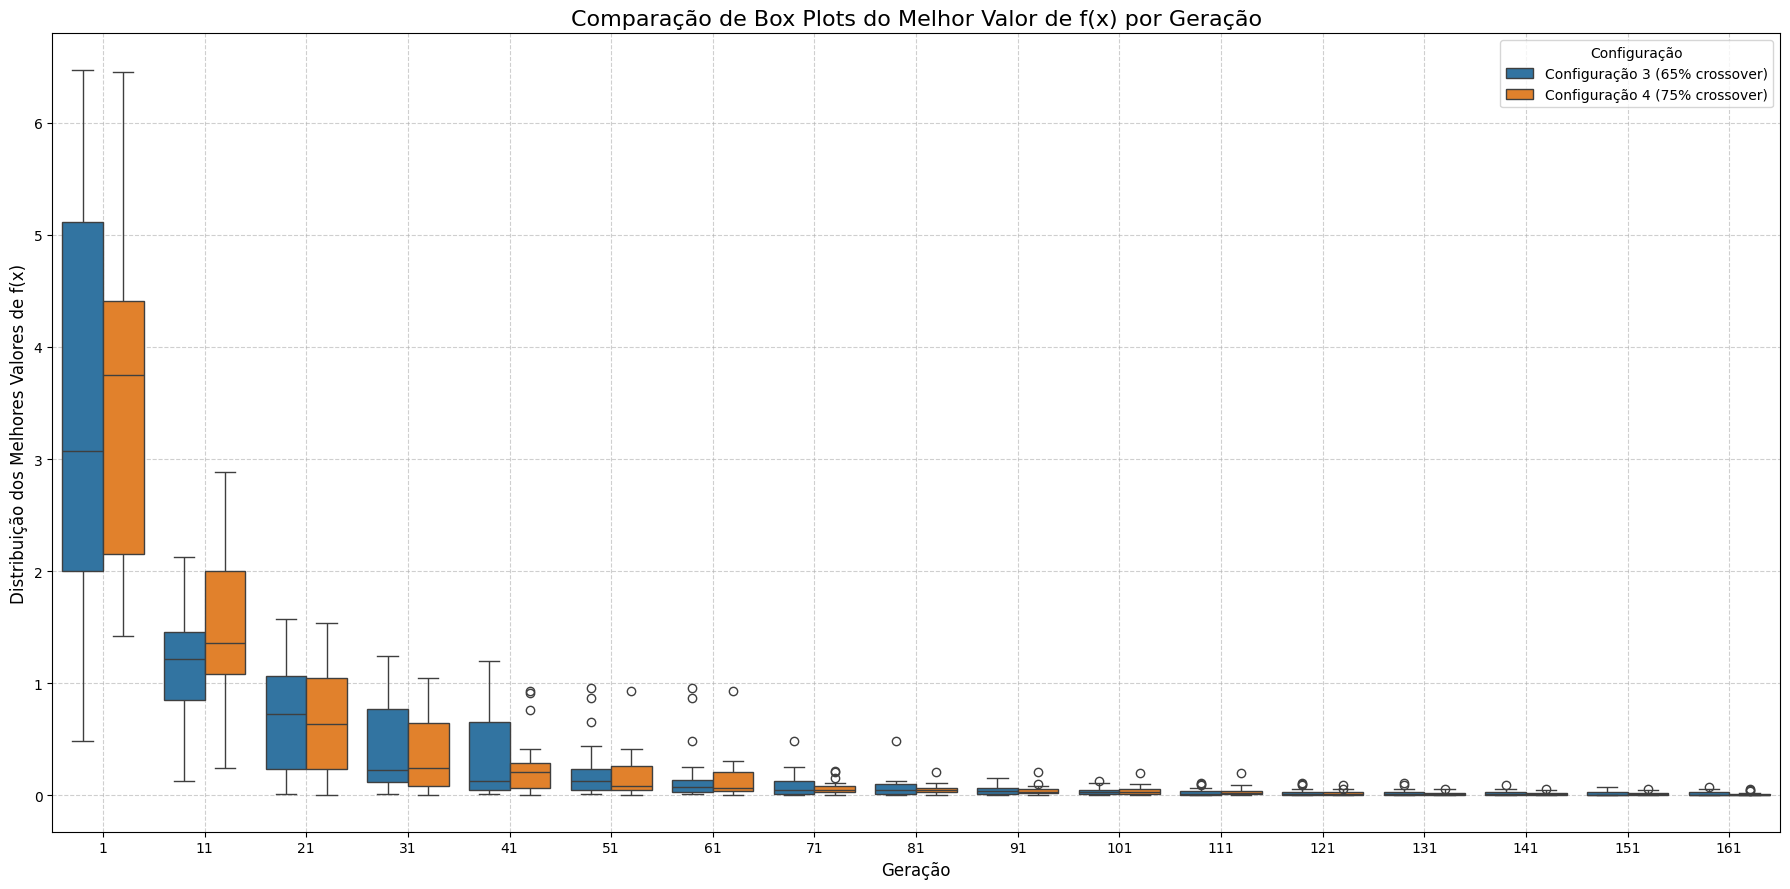

In [ ]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg3,
    df_config2=tabela_resultados_cfg4,
    label_config1='Configuração 3 (65% crossover)',
    label_config2='Configuração 4 (75% crossover)'
)


O boxplot mostra que 75% de crossover convergiu mais rápido para um valor melhor e em geral tem um desempenho melhor

####Melhor indivíduo, média e desvio padrão

##### 75% crossover

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg4)

{'score': 1.3244959543357027e-05, 'experimento': 'Experimento_7'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg4)

{'media': np.float64(0.013548350936558649),
 'desvio_padrao': 0.015592888393264656}

##### 65% mutação

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg3)

{'score': 0.0007216192640946417, 'experimento': 'Experimento_17'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg3)

{'media': np.float64(0.013402039202186699),
 'desvio_padrao': 0.017461766519337868}

##### 75% de crossover demonstrou um resultado médio um pouco menor, mas um desvio padrão menor também. Além disso o menor resultado com crossover de 75% é significativamente melhor do que com 65%, isso mostra que a capacidade de exploração de 75% é melhor do que com 65%, o que é esperado.

### Conclusão

As 2 configurações são bem semelhantes, mas principalmente por convergir mais rápido eu optarei por 75% de crossover.

---
# Algoritmo genético - **configuração 5**
Foi alterado em relação à primeira configuração o método de crossover de uniforme para one point

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg5 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'one_point', #Mudança de uniforme para one point
    'crossover_probability': 0.75, #75% será o novo melhor
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [ ]:
tabela_resultados_cfg5 = executar_experimentos(
    algorithm_param=algorithm_param_cfg5,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
tabela_resultados_cfg5

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,4.216359,4.408801,1.654693,3.681059,2.467174,3.859361,3.666841,3.213063,3.436494,2.936698,...,2.047026,5.934472,4.228307,3.820124,4.403513,1.111767,5.091240,3.248464,4.368175,1.203474
2,4.216359,4.408801,1.654693,3.681059,2.467174,2.341538,3.666841,3.213063,1.499861,2.936698,...,2.047026,5.934472,2.743304,3.820124,2.220185,1.111767,3.876099,3.248464,4.368175,1.203474
3,3.895243,4.408801,1.654693,3.681059,2.467174,2.341538,2.490338,1.929979,1.499861,2.936698,...,2.047026,5.735433,0.660140,2.595663,2.220185,1.111767,3.876099,3.248464,3.336580,1.203474
4,3.895243,2.220522,1.654693,3.681059,2.406508,2.341538,2.490338,1.929979,1.486533,2.528150,...,2.047026,5.735433,0.660140,2.595663,2.220185,1.111767,3.876099,3.248464,3.179594,1.203474
5,3.622960,1.525422,1.654693,3.681059,2.235880,2.341538,2.490338,1.929979,1.100965,2.016105,...,2.047026,5.735433,0.660140,2.595663,2.220185,1.111767,3.876099,1.267496,2.390499,1.203474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.003858,0.057538,0.002528,0.000532,0.003342,0.005418,0.005362,0.003756,0.004686,0.178706,...,0.012446,0.000451,0.009795,0.015184,0.001901,0.003181,0.017512,0.009775,0.002829,0.001550
167,0.003858,0.057538,0.002528,0.000532,0.003342,0.005418,0.005362,0.003756,0.004686,0.178706,...,0.012446,0.000451,0.009795,0.015184,0.001901,0.003181,0.017512,0.009775,0.002829,0.001550
168,0.003858,0.057538,0.002528,0.000532,0.003342,0.005418,0.005362,0.003756,0.004686,0.178706,...,0.012446,0.000451,0.009795,0.015184,0.001901,0.003181,0.017512,0.009775,0.002829,0.001550


### Gráficos do resultado do GA com crossover one point (configuração 5)

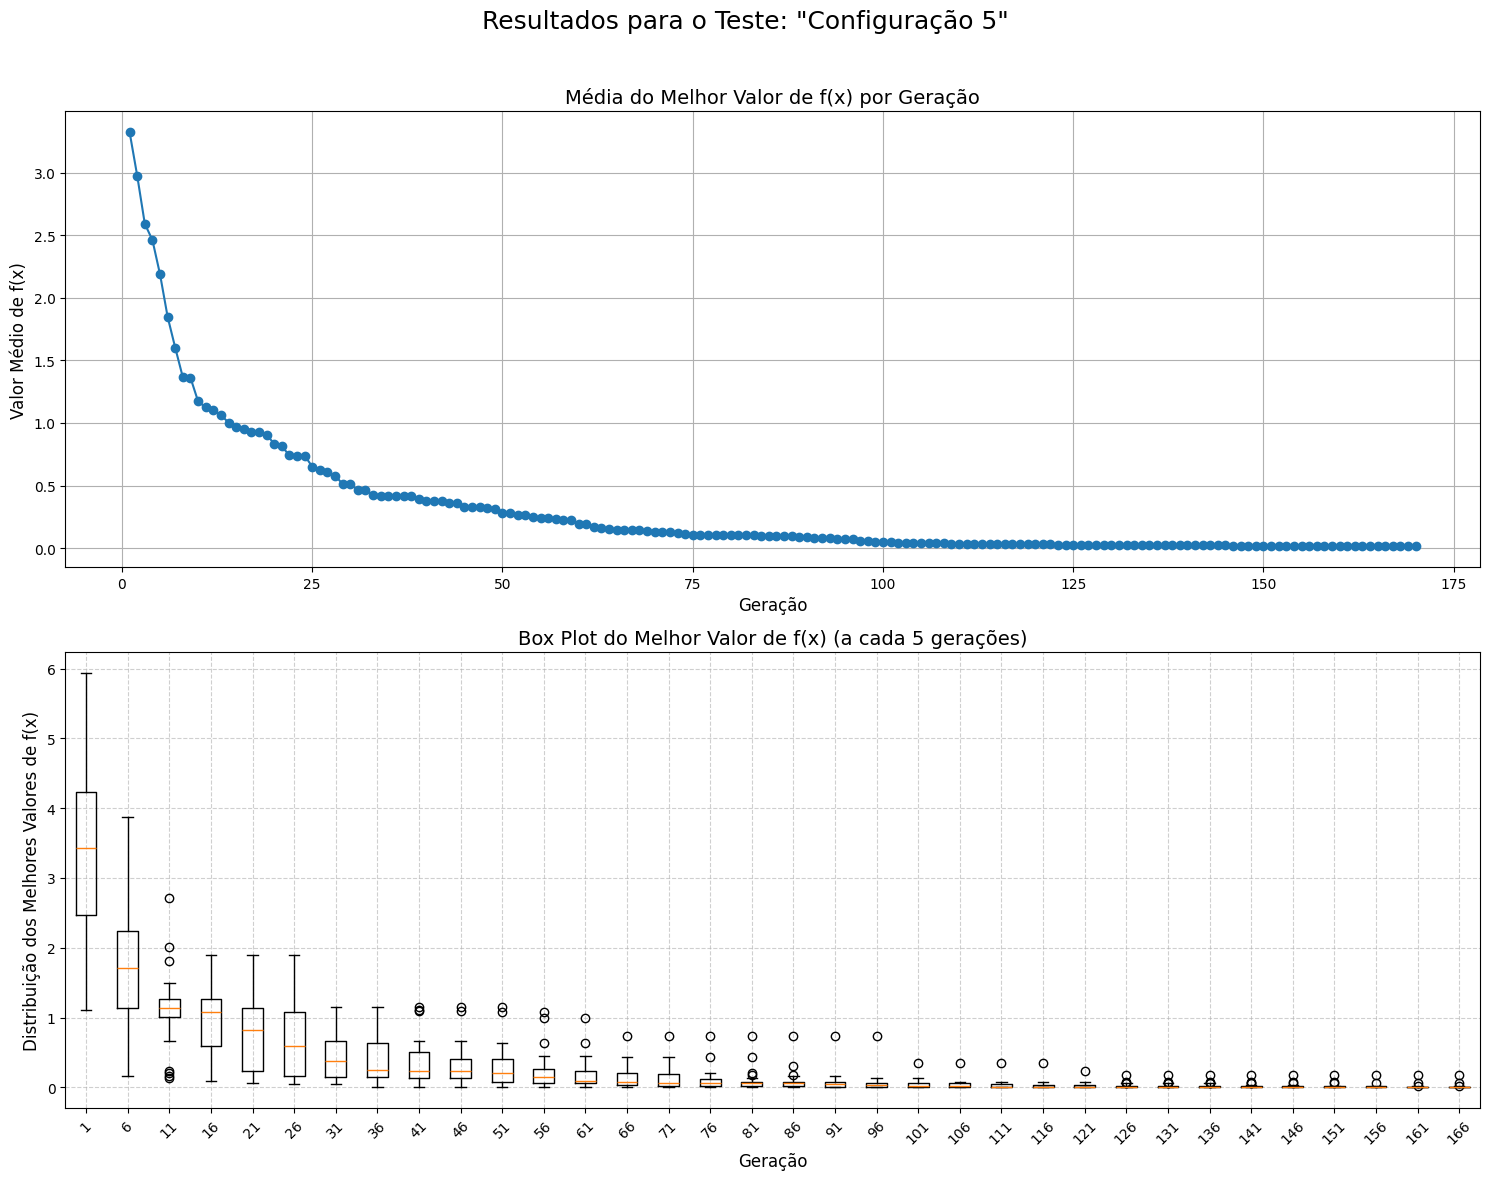

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg5, "Configuração 5")

### Gráficos comparando a Configuração 4 (uniforme) com a Configuração 5 (one point).

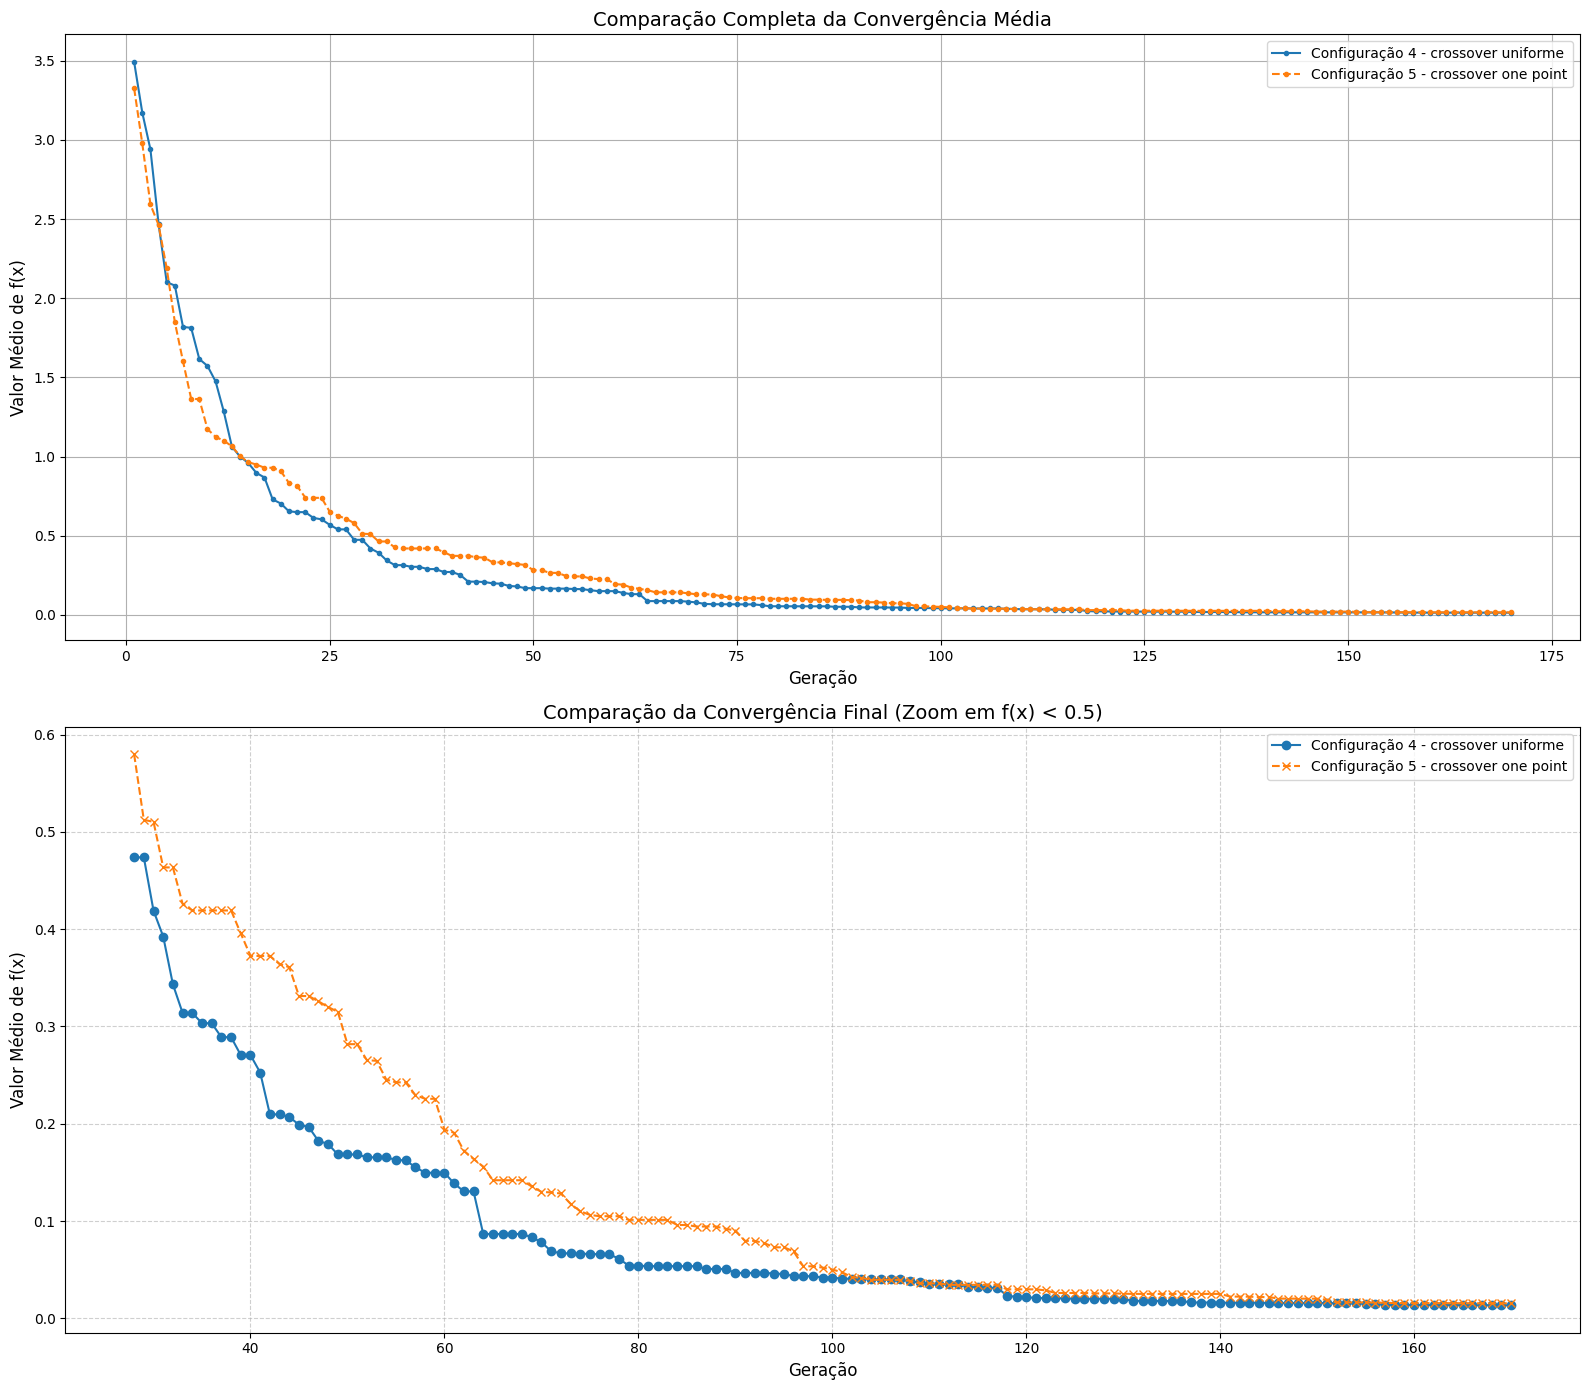

In [ ]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg4,
    df_config2=tabela_resultados_cfg5,
    label_config1='Configuração 4 - crossover uniforme',
    label_config2='Configuração 5 - crossover one point'
)

Em geral, principalmente ao final, o uniforme desempenha melhor do que o one point.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


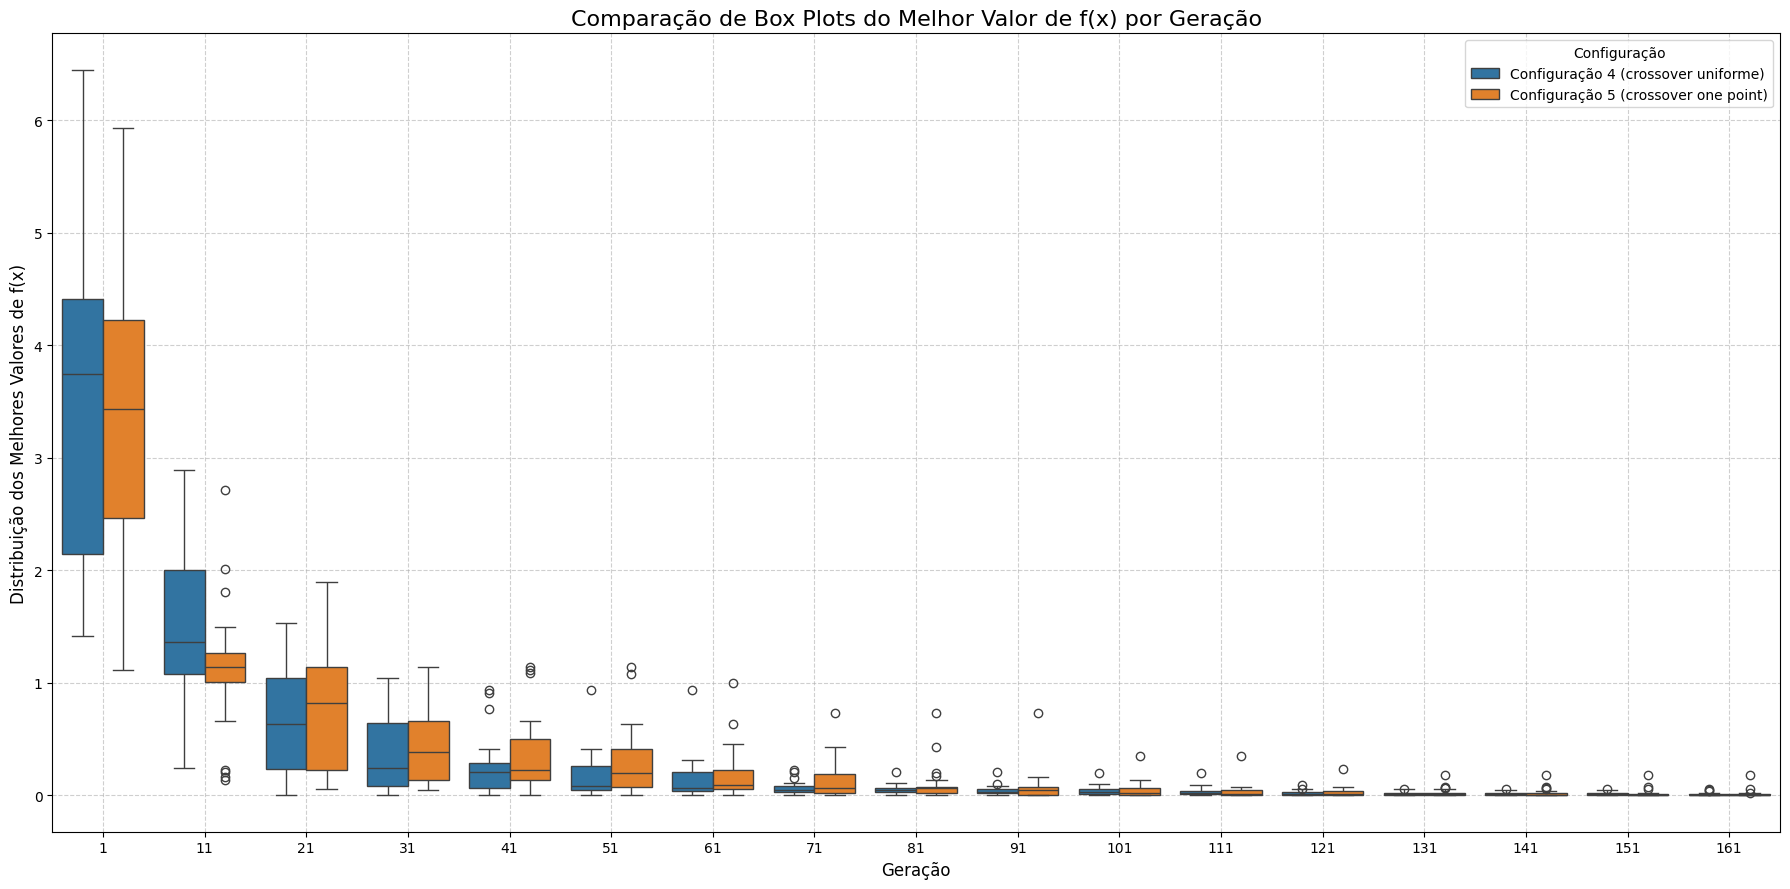

In [ ]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg4,
    df_config2=tabela_resultados_cfg5,
    label_config1='Configuração 4 (crossover uniforme)',
    label_config2='Configuração 5 (crossover one point)'
)


O one point até começa melhor, porém quanto mais perto do final, melhor o uniforme desempenha em relação ao one point. Isso deve ocorrer pelo fator de aleatoriedade (mais exploração) que o uniforme tem.

####Melhor indivíduo, média e desvio padrão

##### crossover one point

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg5)

{'score': 0.00045126187325195133, 'experimento': 'Experimento_17'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg5)

{'media': np.float64(0.01544518186748192),
 'desvio_padrao': 0.03600666800037032}

##### crossover uniforme

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg4)

{'score': 1.3244959543357027e-05, 'experimento': 'Experimento_7'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg4)

{'media': np.float64(0.013548350936558649),
 'desvio_padrao': 0.015592888393264656}

#####O crossover uniforme é mais consistente (menor desvio padrão) e converge melhor (menor valor mínimo e melhor média).

### Conclusão

Como o uniforme teve um valor médio e desvio padrão melhores, além do menor de todos significativamente melhor que o menor de todos do one point, manteremos o crossover uniforme. Vale dizer que já esperava o crossover uniforme ser melhor que o one point, por gerar mais aleatoriedade ele gera mais exploração e impede um superindivíduo.

---
# Algoritmo genético - **configuração 6**
Foi alterado em relação à primeira configuração o método de mutação para uniforme (totalmente aleatório).

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg6 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'uniform_by_x', #mudamos a mutação de creep para uniforme
    'crossover_type': 'uniform', #mantem crossover uniforme
    'crossover_probability': 0.75,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [ ]:
tabela_resultados_cfg6 = executar_experimentos(
    algorithm_param=algorithm_param_cfg6,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
tabela_resultados_cfg6

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,5.042572,5.520167,3.287800,6.714897,5.352979,4.256964,4.435755,3.693646,4.474140,4.150449,...,0.967465,1.824122,1.668095,5.830774,2.497337,4.467468,3.176187,6.425400,3.230263,5.297021
2,5.042572,5.520167,1.440436,0.184447,4.848443,4.256964,4.435755,3.693646,4.474140,2.143449,...,0.967465,1.824122,1.668095,5.830774,2.497337,3.069063,3.176187,2.128583,3.230263,4.216290
3,5.042572,1.009263,1.440436,0.184447,4.583439,3.852326,2.586381,3.693646,3.375871,2.143449,...,0.967465,1.824122,1.668095,5.830774,2.497337,3.069063,3.176187,2.128583,3.230263,4.216290
4,2.325832,1.009263,1.440436,0.184447,3.122162,2.608206,2.586381,3.693646,3.375871,2.143449,...,0.967465,1.637879,1.668095,3.852193,2.497337,2.768618,3.176187,2.128583,2.733071,2.199248
5,2.134165,1.009263,1.440436,0.184447,2.960509,1.347856,2.586381,0.995390,1.771132,2.143449,...,0.967465,1.637879,1.668095,3.596721,2.497337,1.062043,1.217084,2.128583,1.060103,2.199248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.000313,0.002712,0.003973,0.000114,0.019457,0.008026,0.024258,0.012056,0.001654,0.000712,...,0.004336,0.020303,0.000218,0.001354,0.004175,0.000977,0.037614,0.031172,0.004536,0.003458
167,0.000313,0.002712,0.003973,0.000114,0.019457,0.008026,0.024258,0.012056,0.001654,0.000712,...,0.004336,0.020303,0.000218,0.001354,0.004175,0.000977,0.037614,0.031172,0.004536,0.003458
168,0.000313,0.002712,0.003973,0.000114,0.019457,0.008026,0.024258,0.012056,0.001654,0.000712,...,0.004336,0.020303,0.000218,0.001354,0.004175,0.000977,0.037614,0.031172,0.004536,0.003458


### Gráficos do resultado do GA com crossover uniforme

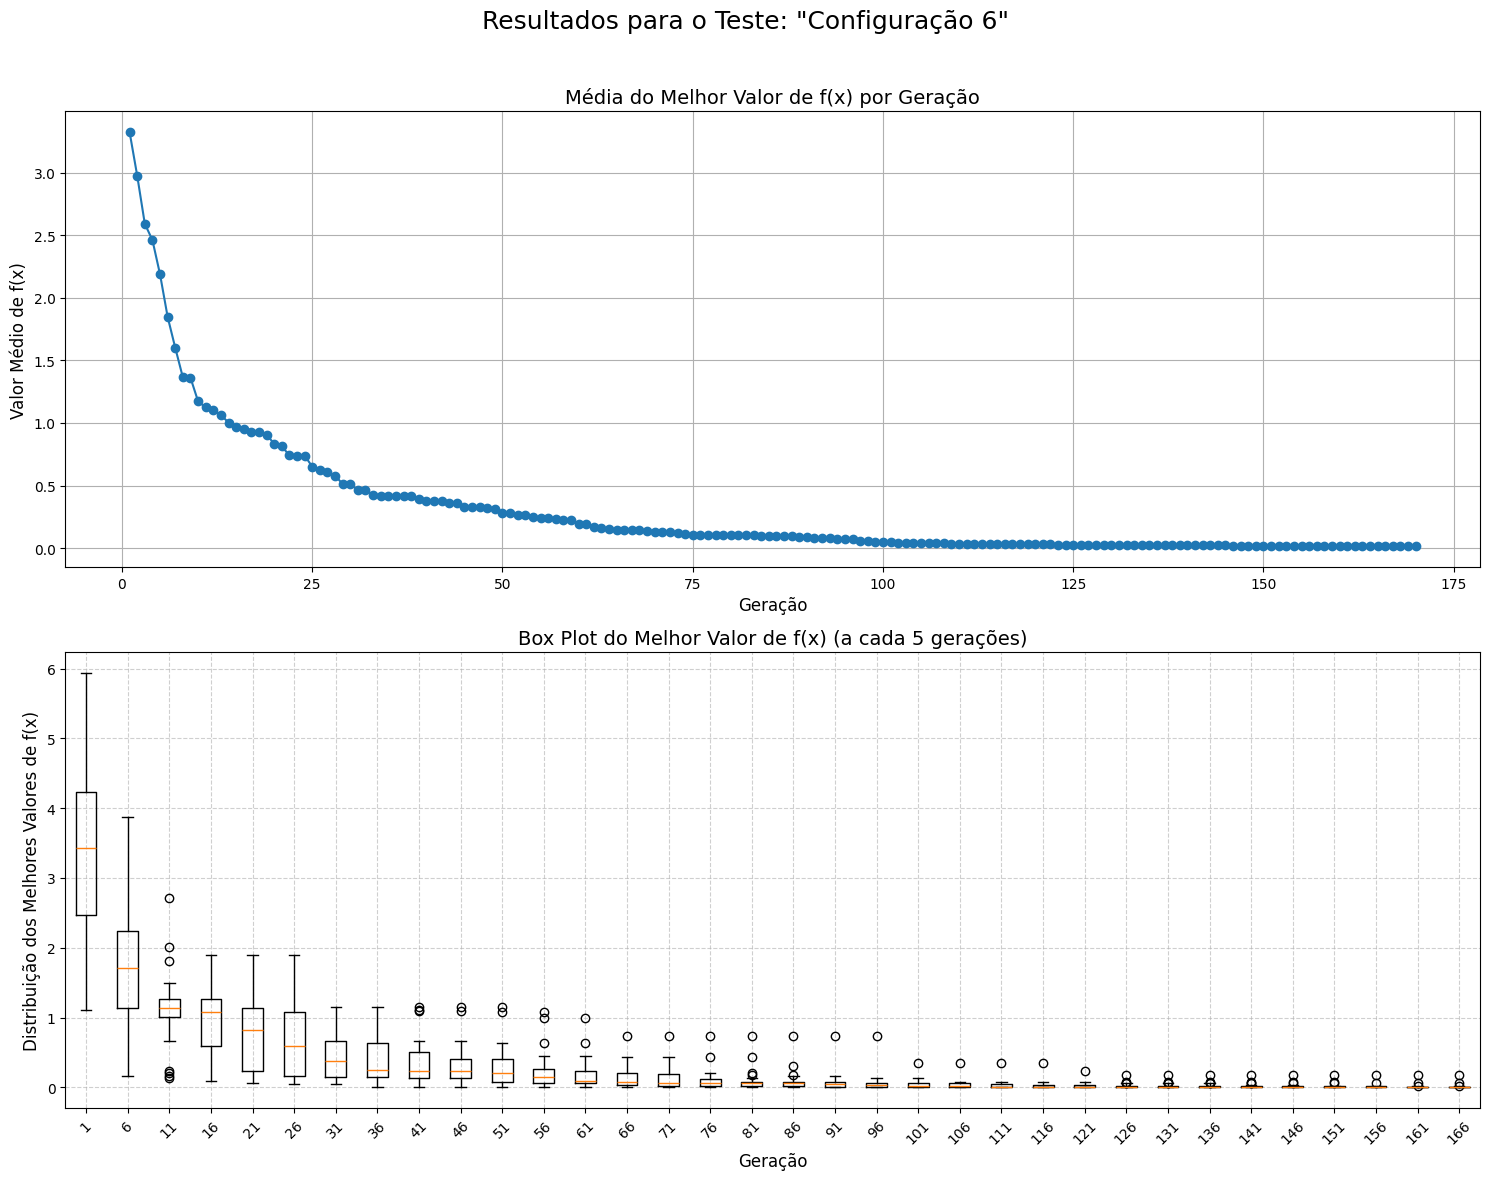

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg5, "Configuração 6")

### Gráficos comparando a Configuração 4 (Mutação creep) com a Configuração 6 (Mutação uniforme).

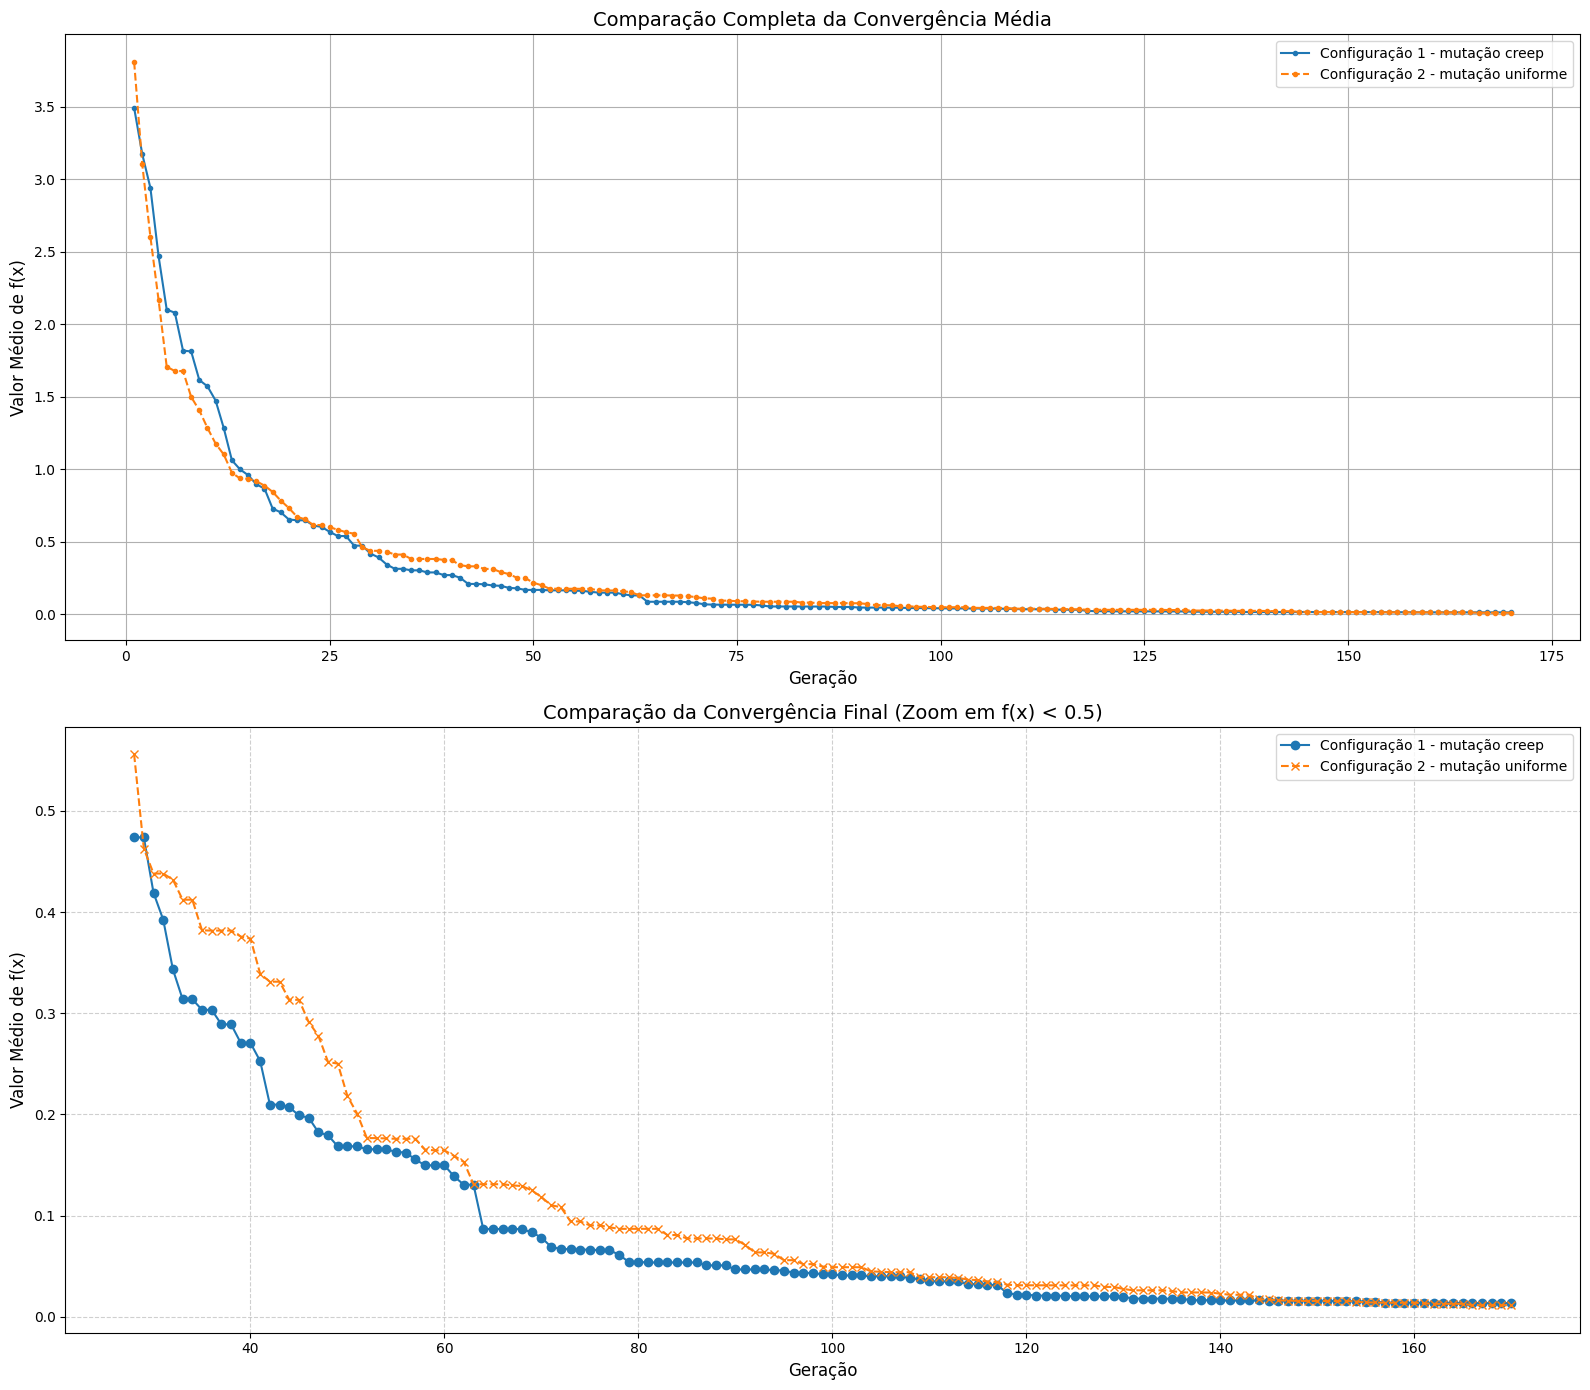

In [ ]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg4,
    df_config2=tabela_resultados_cfg6,
    label_config1='Configuração 1 - mutação creep',
    label_config2='Configuração 2 - mutação uniforme'
)

Se olharmos apenas o primeiro gráfico, poderiamos concluir que a uniforme é melhor, porém a gaussian_by_x foi melhor nas etapas finais de convergência.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


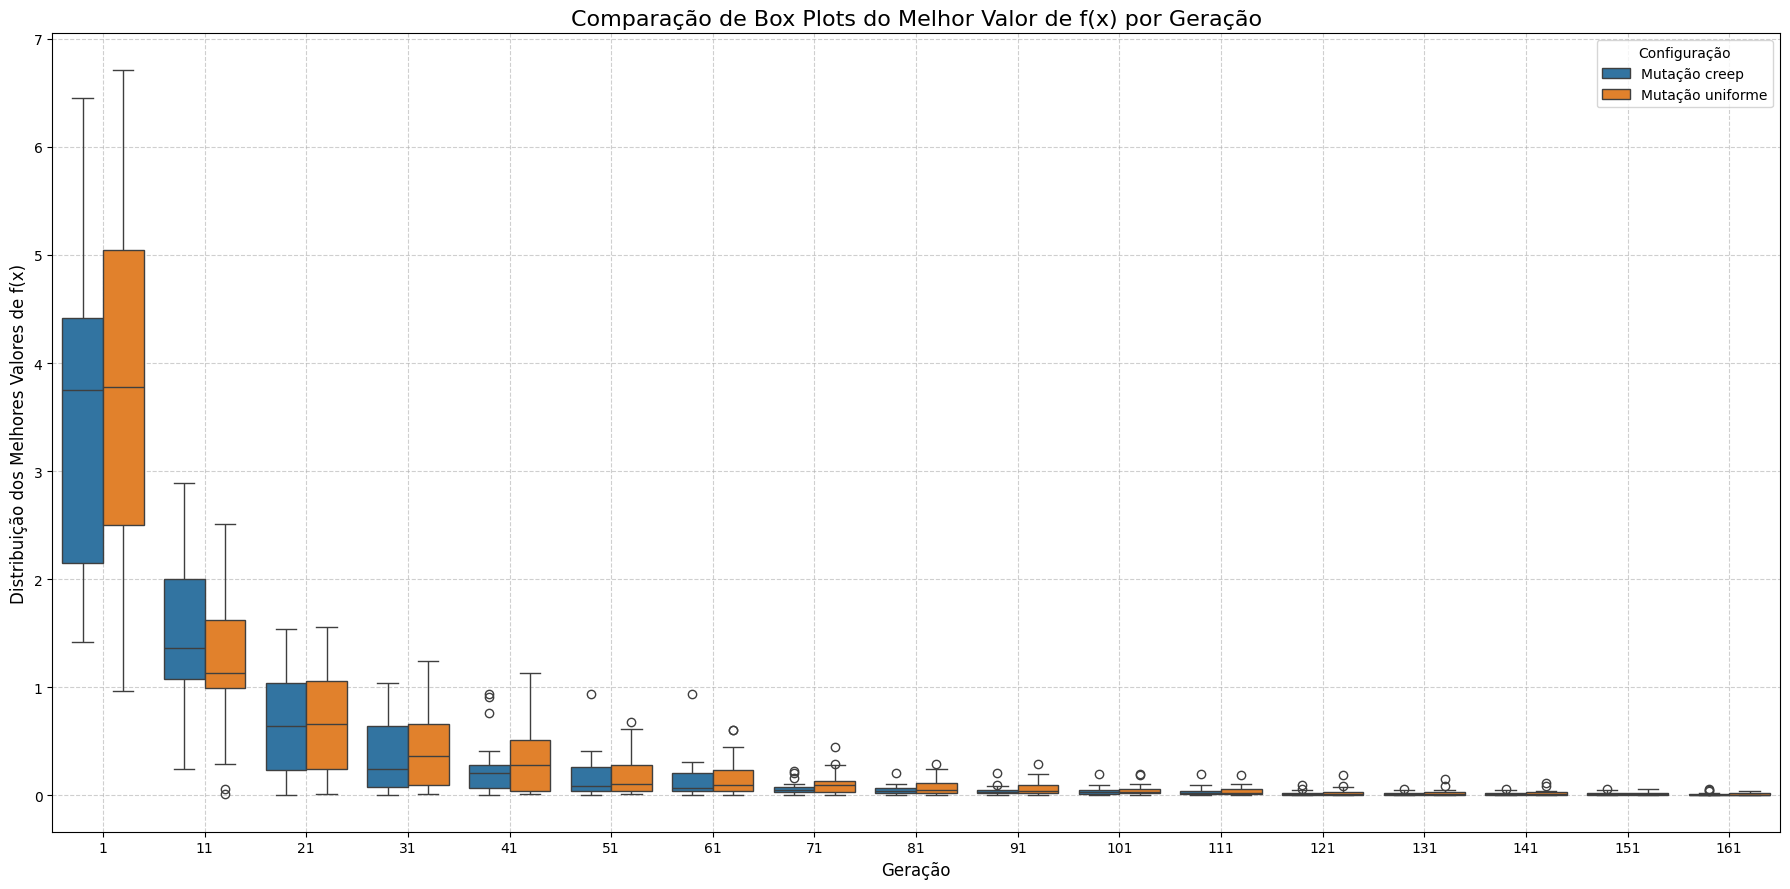

In [ ]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg4,
    df_config2=tabela_resultados_cfg6,
    label_config1='Mutação creep',
    label_config2='Mutação uniforme'
)


O boxplot mostra que a uniforme se mantém um pouco mais estável (menor cauda) e menor no início, porém na etapa final (que é a mais importante) a mutação creep (gaussian_by_x) foi melhor e mais estável (menor cauda).

####Melhor indivíduo, média e desvio padrão

##### Mutação uniforme

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg6)

{'score': 0.00011447296113686889, 'experimento': 'Experimento_4'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg6)

{'media': np.float64(0.011417321054698703),
 'desvio_padrao': 0.0128571629628696}

##### Mutação gaussiana (creep)

In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg4)

{'score': 1.3244959543357027e-05, 'experimento': 'Experimento_7'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg4)

{'media': np.float64(0.013548350936558649),
 'desvio_padrao': 0.015592888393264656}

##### A mutação uniforme domina no inicio, isso faz com que a média dos melhores dele ser melhor que a da mutação creep. Porém como demonstra os gráficos, na parte final a mutação creep converge bem melhor.

### Conclusão

Manterei a mutação creep (gaussian_by_x) como a melhor escolha devido à convergência nas últimas gerações.

---
# Poda de gerações

Como visto a melhor configuração foi a quarta:

```python

algorithm_param_cfg4 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.75,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}
```

Para decidir quando podar, vou usar um valor mínimo de score, a partir disso irei mandar o algoritmo parar quando atingir esse valor. Farei isso novamente para 25 experimentos e depois tirarei uma média de gerações para definir qual valor de gerações usarei.

In [ ]:
def executar_experimentos_ga_com_valor_minimo(algorithm_param, n_dim, num_experimentos, score_alvo=None):
    """
    Executa o Algoritmo Genético várias vezes.
    Pode parar quando um score_alvo é atingido.
    """
    resultados_dict = {}
    geracoes_para_atingir_alvo = []
    varbound = np.array([[-5.12, 5.12]] * n_dim)


    for i in range(1, num_experimentos + 1):
        model = ga(
            dimension=n_dim,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param
        )

        model.run(
            function=rastrigin_function,
            no_plot=True,
            progress_bar_stream=None,
            disable_printing=True,
            stop_when_reached=score_alvo #PARÂMETRO PARA PEDIR PARADA
        )

        #Guarda o número de gerações que foram necessárias
        geracoes_para_atingir_alvo.append(len(model.report))

    return geracoes_para_atingir_alvo


    #Executa o experimento com o objetivo de atingir f(x) < 0.01
lista_de_geracoes = executar_experimentos_ga_com_valor_minimo(
    algorithm_param=algorithm_param_cfg4,
    n_dim=2,
    num_experimentos=25,
    score_alvo=0.01
)



/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [ ]:
print(f"Gerações necessárias para atingir um score < 0.01 em cada experimento:")
print(lista_de_geracoes)
print(f"\nEm média, foram necessárias {np.mean(lista_de_geracoes):.2f} gerações.")

Gerações necessárias para atingir um score < 0.01 em cada experimento:
[84, 64, 170, 170, 57, 76, 61, 118, 109, 48, 170, 77, 44, 170, 68, 63, 170, 75, 170, 170, 75, 78, 116, 170, 109]

Em média, foram necessárias 107.28 gerações.


Teve alguns gerações que chegaram em 170, isso ocorre porque elas não conseguiram ter um valor menor que 0.01

##Usando 108 gerações agora:

In [ ]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg4_com_poda = {
    'max_num_iteration': 108,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.75,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}

tabela_resultados_cfg4_com_poda = executar_experimentos(
    algorithm_param=algorithm_param_cfg4_com_poda,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)



Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


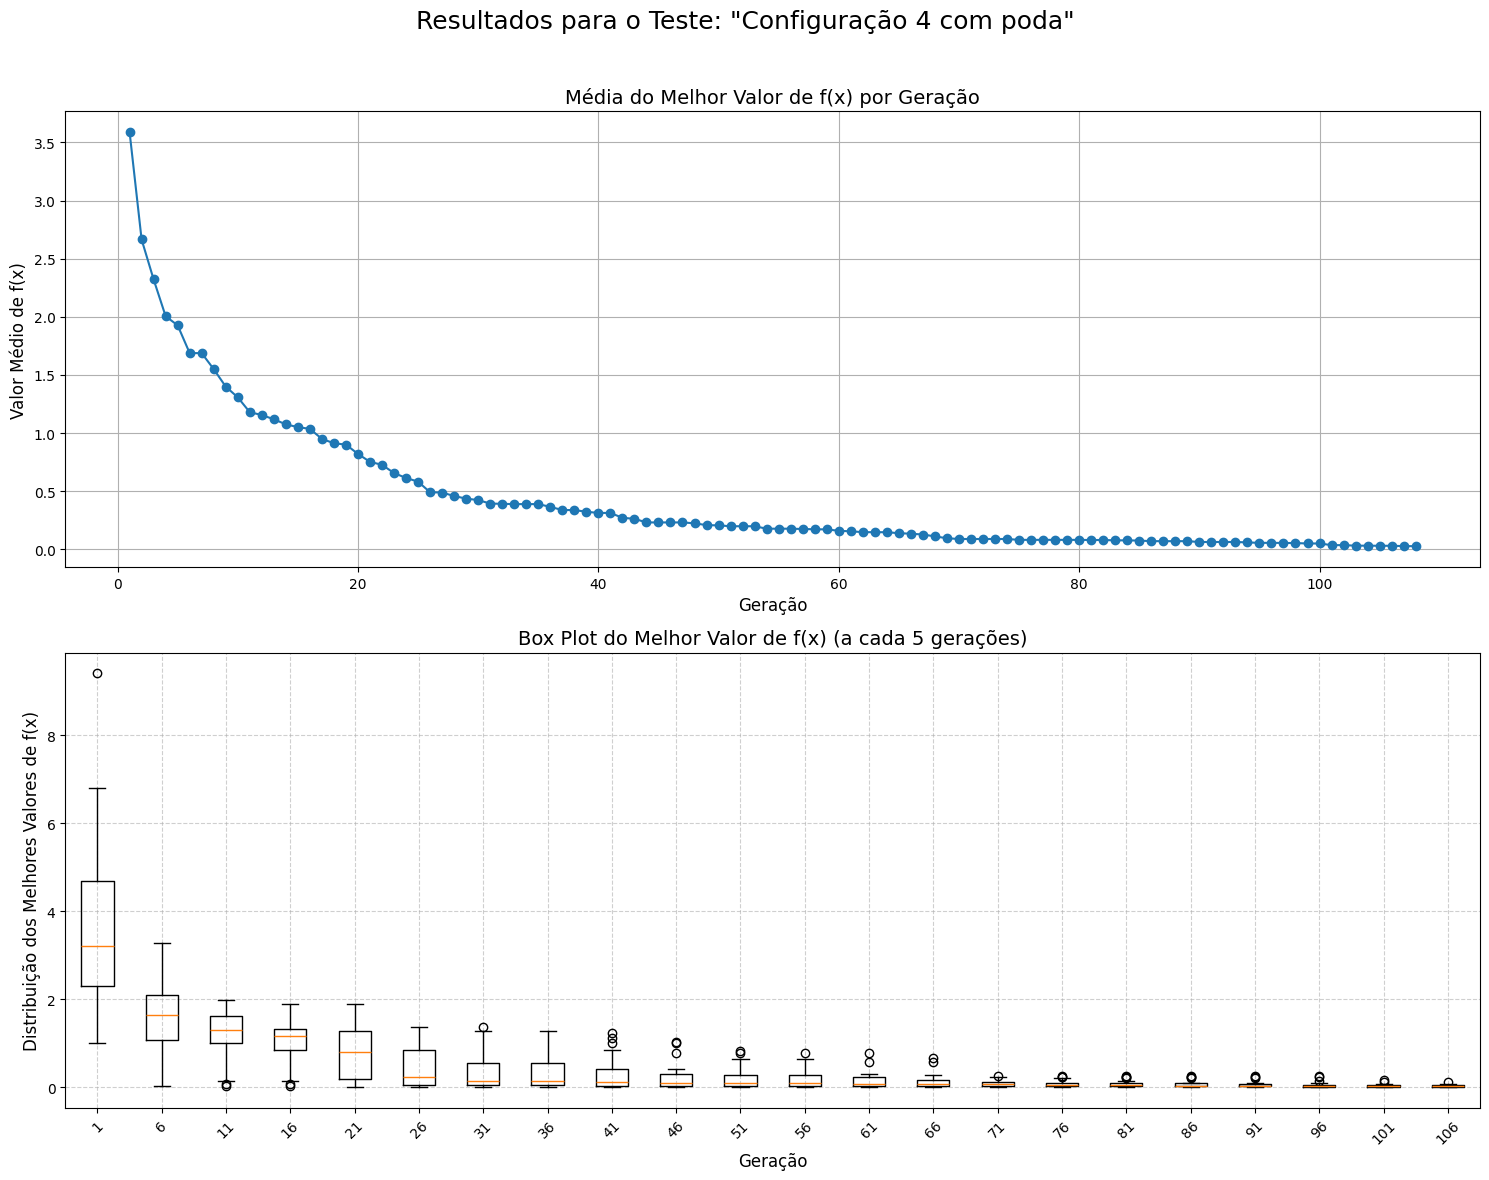

In [ ]:
plotar_resultados_experimentos(tabela_resultados_cfg4_com_poda, "Configuração 4 com poda")

In [ ]:
tabela_resultados_cfg4_com_poda

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10,...,Experimento_16,Experimento_17,Experimento_18,Experimento_19,Experimento_20,Experimento_21,Experimento_22,Experimento_23,Experimento_24,Experimento_25
Geração,,,,,,,,,,,,,,,,,,,,,
1,9.408011,2.002732,2.941046,3.964027,1.132961,1.019082,3.220615,2.309155,3.673633,2.392550,...,6.805584,6.489541,2.969579,3.502374,2.929331,1.327447,1.184478,3.349504,3.254529,4.678809
2,4.325702,2.002732,2.941046,1.732301,1.132961,1.019082,3.220615,2.309155,2.649381,2.392550,...,1.018407,6.489541,2.154670,1.620596,0.390272,1.327447,0.762177,1.641045,3.254529,4.678809
3,4.325702,2.002732,2.941046,1.701537,1.132961,1.019082,3.220615,2.309155,2.649381,0.029919,...,1.018407,6.489541,2.154670,1.620596,0.390272,1.327447,0.762177,1.641045,2.347001,4.678809
4,2.094990,2.002732,2.941046,1.701537,1.132961,1.019082,0.152318,2.309155,2.649381,0.029919,...,1.018407,4.702492,2.154670,1.620596,0.390272,1.327447,0.762177,1.641045,2.347001,4.408697
5,2.094990,2.002732,2.941046,1.701537,1.132961,1.019082,0.152318,2.309155,2.649381,0.029919,...,1.018407,4.702492,2.025592,1.620596,0.390272,1.327447,0.762177,1.641045,2.090360,4.408697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.000636,0.047220,0.048475,0.047479,0.000139,0.025145,0.012996,0.002096,0.007027,0.000998,...,0.027843,0.062374,0.075928,0.055114,0.011939,0.030827,0.003897,0.007790,0.010737,0.022992
105,0.000636,0.047220,0.048475,0.047479,0.000139,0.025145,0.012996,0.002096,0.007027,0.000998,...,0.027843,0.062374,0.075928,0.055114,0.011939,0.010853,0.003897,0.007790,0.010737,0.022992
106,0.000636,0.047220,0.048475,0.047479,0.000139,0.025145,0.012996,0.002096,0.007027,0.000998,...,0.027843,0.062374,0.075928,0.055114,0.011939,0.010853,0.003897,0.007790,0.010737,0.022992


In [ ]:
obter_melhor_resultado_geral(tabela_resultados_cfg4_com_poda)

{'score': 0.00013915261785157895, 'experimento': 'Experimento_5'}

In [ ]:
calcular_media_resultados_finais(tabela_resultados_cfg4_com_poda)

{'media': np.float64(0.02682293210132755),
 'desvio_padrao': 0.028630102900613377}

O valor médio do experimento com poda foi de 0.026, acredito que já seja suficientemente perto de 0. Portanto, o menor número de gerações com 300 populações cada, foi de 108 gerações. Porém dependendo do quão perto de 0 se queira esse número pode aumentar ou diminuir.

---
# Extra - Evolução diferencial

Como a evolução diferencial não está implementada em *GeneticAlgorithm2*, descobri que *scipy* implementa ela de forma mais fácil que a biblioteca *DEAP*, onde ela é mais complexa de usar e aprender.


scipy.differential_evolution por padrão ja faz minimização então não precisei modificar a função.

### Hiperparametros utilizados para evolução diferencial:



###Formula para mutação

```python
 'strategy': 'best1bin'
```
define a fórmula de mutação para criar o vetor$$
\mathbf{v}_{i,G+1} = \mathbf{x}_{\text{best},G} + F \cdot (\mathbf{x}_{r_1,G} - \mathbf{x}_{r_2,G})
$$

onde $x_{\text{best},G}$ é o indivíduo de melhor aptidão. Preferi usa-la, pois pelo o que pesquisei é uma das mais populares.

###Valor de F (peso aplicado ao vetor de diferenças)
o scipy usa por **padrão** uma técinica chamada **dither** onde valor de F é escolhido aleatoriamente de uma distribuição uniforme entre 0.5 e 1.0. Eu preferi manter essa configuração.

### Probabilidade de crossover
Usei a probabilidade de crossover padrão do scipy que é 70%.

 ### População e número de gerações
 mantive igual ao do GA (170 gerações com 300 indivíduos) para uma comparação direta com GA.

### Comparando a melhor configuração que encontrei de GA (configuração 1) com evolução diferencial

Como o scipy não funciona igual ao GeneticAlgorithm2, não podemos definir um número de geração desejada, pois ele funciona definindo um valor objetivo para a função de aptidão. Para usar 170 gerações e comparar com GA tive que definir para o algoritmo parar quando chegar em 0. Como ele para antes (quando reconhece que não terá mais evoluções), eu repeti os ultimos valores. Como mostrarei na tabela do pandas o valor de parada dele é tão baixo que o pandas não consegue representar e coloca como se fosse 0.0.

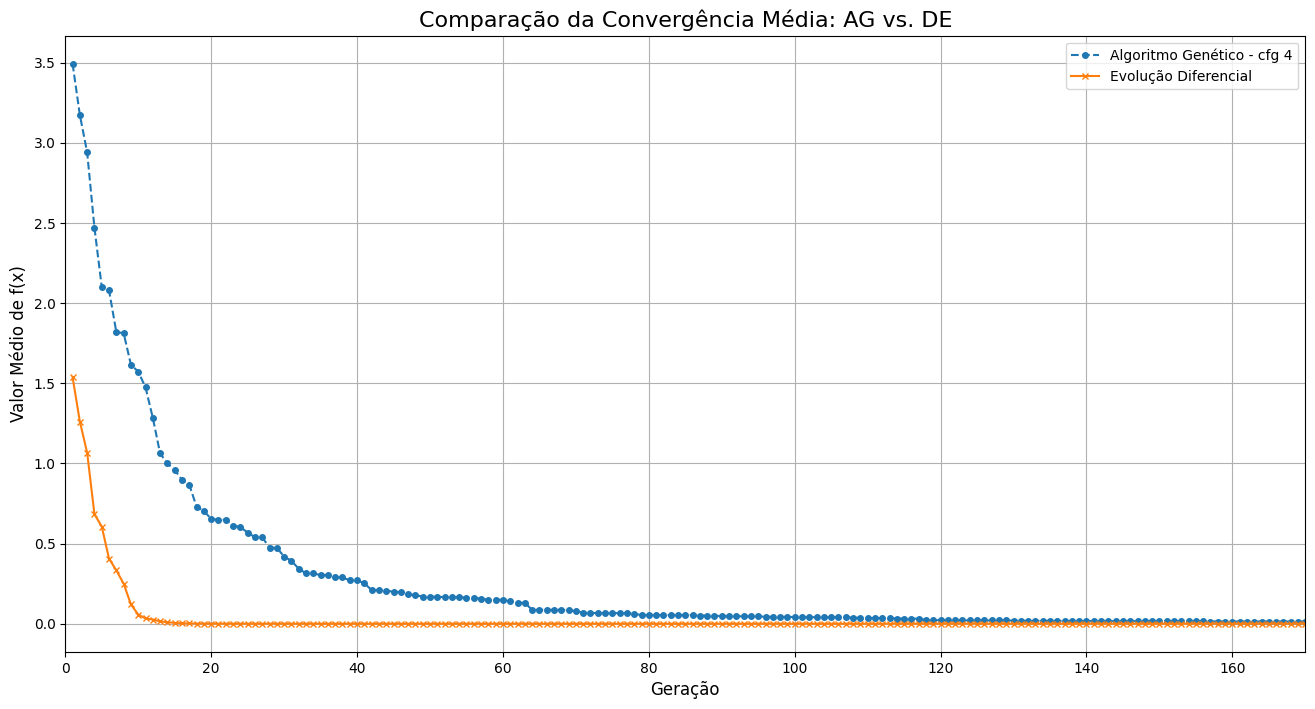

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from scipy.optimize import differential_evolution


def executar_experimentos_de(de_params, n_dim, num_experimentos=25):
    resultados_dict = {}
    bounds = [(-5.12, 5.12)] * n_dim

    for i in range(1, num_experimentos + 1):
        convergence_history = []

        #Scipy não pega histórico tive que criar essa funcao para isso
        def callback_de(intermediate_result):
            convergence_history.append(intermediate_result.fun)

        differential_evolution(func=rastrigin_function, bounds=bounds, callback=callback_de, **de_params)
        resultados_dict[f"Experimento_{i}"] = convergence_history

    #Como o DE do scipy funciona por valor de convergencia e nao geracoes desejadas,
    #Tive que repetir o último valor
    max_len = max(max(len(v) for v in resultados_dict.values()), de_params['maxiter']+1)

    for k, v in resultados_dict.items():
        while len(v) < max_len:
            v.append(v[-1])
    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"
    return df_resultados

n_dimensao = 2
num_execucoes = 25


params_de = {
    'maxiter': 170,
    'popsize': 300 // n_dimensao,
    'strategy': 'best1bin',
    'tol': 0,  #Força a usar 170 gerações
}


tabela_de = executar_experimentos_de(params_de, n_dimensao, num_execucoes)

media_ag = tabela_resultados_cfg4.mean(axis=1)
media_de = tabela_de.mean(axis=1)

plt.figure(figsize=(16, 8))
plt.plot(media_ag.index, media_ag.values, marker='o', markersize=4, linestyle='--', label='Algoritmo Genético - cfg 4')
plt.plot(media_de.index, media_de.values, marker='x', markersize=4, linestyle='-', label='Evolução Diferencial')
plt.title('Comparação da Convergência Média: AG vs. DE', fontsize=16)
plt.xlabel('Geração', fontsize=12)
plt.ylabel('Valor Médio de f(x)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(0, 170)
plt.show()

## Poda evolução diferencial

Para comparar com GA e sua poda com os melhores hiperparametros. Usarei o mesmo valor de tolerância (0.01), tirarei a média das gerações necessarias em 25 experimentos.

In [ ]:
def executar_experimentos_DE_com_valor_minimo(de_params, n_dim, num_experimentos, score_alvo):
    """
    Executa a Evolução Diferencial várias vezes, parando quando um score_alvo é atingido,
    e retorna o número de gerações necessárias para cada experimento.
    """

    geracoes_para_atingir_alvo = []
    bounds = [(-5.12, 5.12)] * n_dim

    for i in range(1, num_experimentos + 1):
        convergence_history = []

        #O callback agora tem a lógica para parar a execução
        def callback_de(intermediate_result):
            score_atual = intermediate_result.fun
            convergence_history.append(score_atual)

            #Se o score atingiu o alvo, retorne True para parar
            if score_atual <= score_alvo:
                return True

        differential_evolution(
            func=rastrigin_function,
            bounds=bounds,
            callback=callback_de,
            **de_params
        )

        # Guarda o número de gerações que foram necessárias
        geracoes_para_atingir_alvo.append(len(convergence_history))

    return geracoes_para_atingir_alvo

#Parâmetros para a DE (use maxiter alto, pois ele vai parar antes)
params_de_para_poda = {
    'maxiter': 500, #Um valor alto o suficiente para garantir que ele atinja o alvo
    'popsize': 300 // 2,
    'strategy': 'best1bin',
    'tol': 0,
}

#Executa o experimento com o objetivo de atingir f(x) < 0.01
lista_de_geracoes_de = executar_experimentos_DE_com_valor_minimo(
    de_params=params_de_para_poda,
    n_dim=2,
    num_experimentos=25,
    score_alvo=0.01
)

#Calcula a média e arredonda para o inteiro mais próximo
media_geracoes_de = int(np.mean(lista_de_geracoes_de).round())

print("RESULTADOS PARA A EVOLUÇÃO DIFERENCIAL (DE)")
print(f"Gerações necessárias para atingir um score < 0.01 em cada experimento:")
print(lista_de_geracoes_de)
print(f"\nEm média, foram necessárias {np.mean(lista_de_geracoes_de):.2f} gerações.")
print(f"O valor arredondado para usar no novo 'maxiter' é: {media_geracoes_de}")




RESULTADOS PARA A EVOLUÇÃO DIFERENCIAL (DE)
Gerações necessárias para atingir um score < 0.01 em cada experimento:
[11, 13, 12, 13, 9, 14, 16, 14, 17, 13, 11, 16, 13, 14, 11, 18, 13, 17, 13, 15, 16, 15, 15, 11, 9]

Em média, foram necessárias 13.56 gerações.
O valor arredondado para usar no novo 'maxiter' é: 14


Ou seja, para atingir o mesmo valor 0.01 que em média foram necessário 108 gerações, para a evolução diferencial foram necessários 14 gerações. Mostrando assim sua superioridade e o número mínimo de 14 gerações necessárias para concluir o trabalho.

In [ ]:
# obter_melhor_resultado_geral
# calcular_media_resultados_finais

Iniciando bateria de 25 experimentos com DE (n=2)...


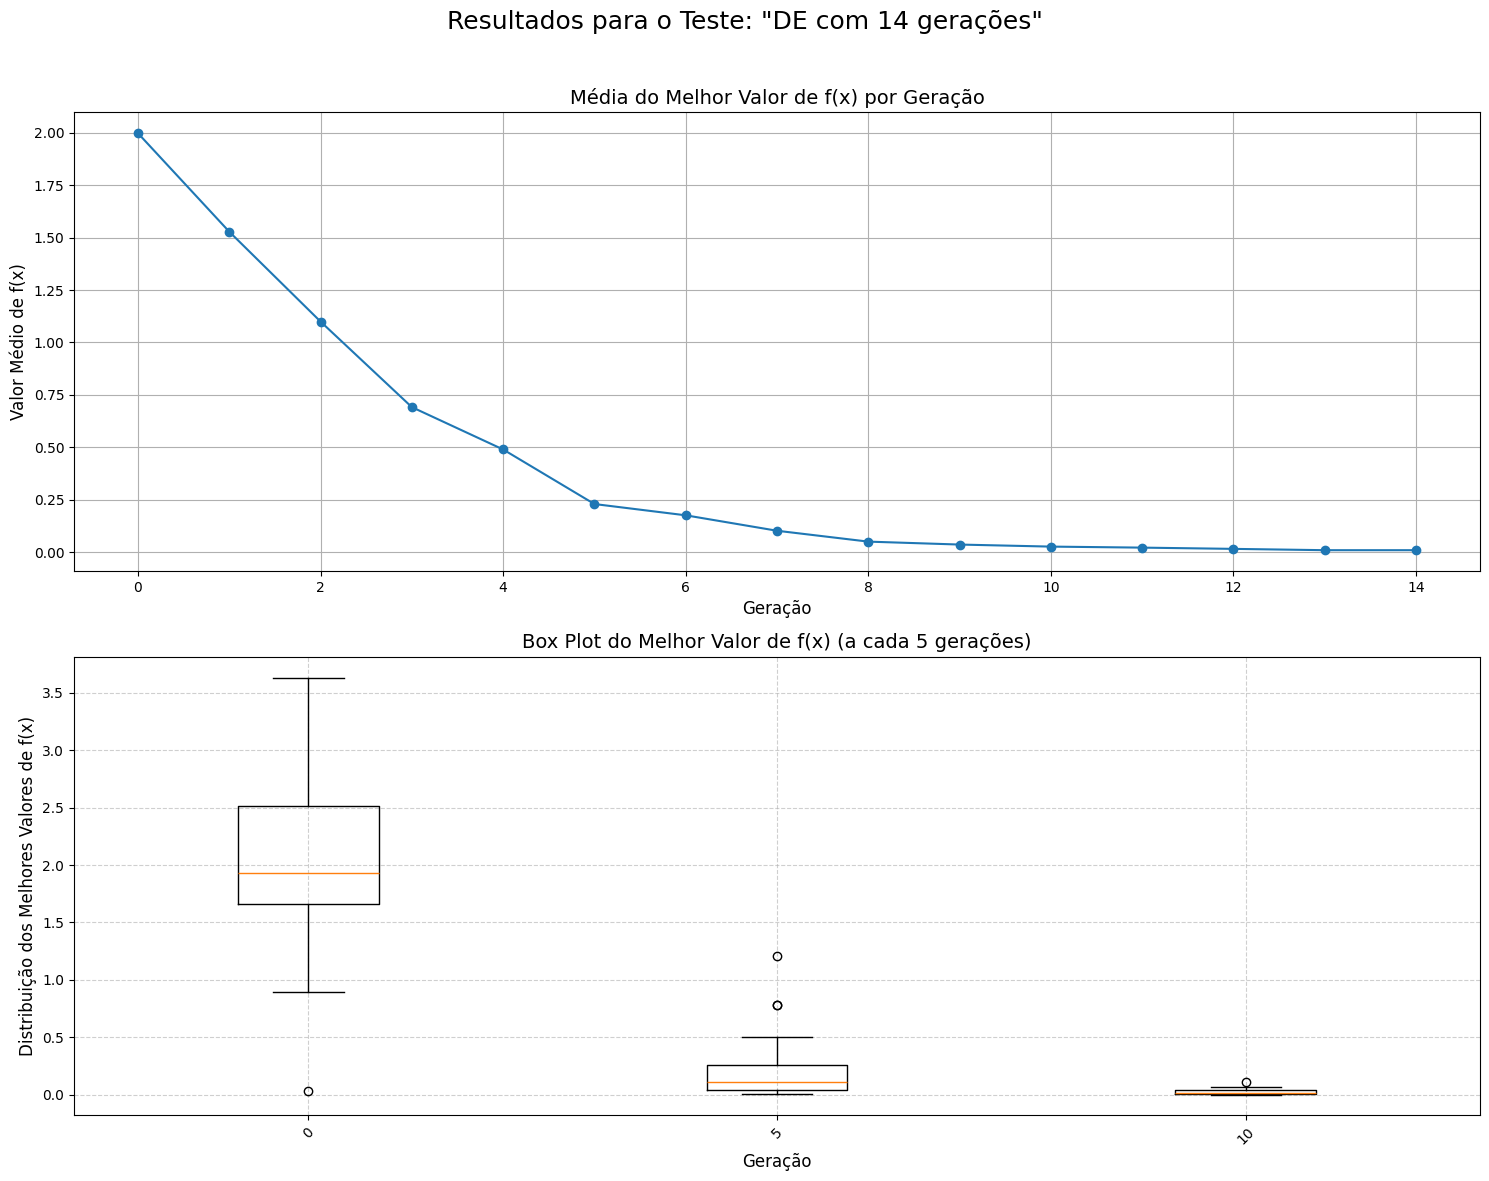

ANÁLISE DE PERFORMANCE APÓS 14 GERAÇÕES
  - Performance Média....: 0.009038 (± 0.013793)
  - Melhor Performance.....: 0.000087 (no Experimento_15)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import differential_evolution

def executar_experimentos_de(de_params, n_dim, num_experimentos=25):
    """Executa a Evolução Diferencial várias vezes."""
    resultados_dict = {}
    bounds = [(-5.12, 5.12)] * n_dim

    print(f"Iniciando bateria de {num_experimentos} experimentos com DE (n={n_dim})...")

    for i in range(1, num_experimentos + 1):
        convergence_history = []
        def callback_de(intermediate_result):
            convergence_history.append(intermediate_result.fun)

        # O callback é chamado no início (geração 0), então o número de chamadas é maxiter + 1
        differential_evolution(func=rastrigin_function, bounds=bounds, callback=callback_de, **de_params)
        resultados_dict[f"Experimento_{i}"] = convergence_history

    # Preenchimento para garantir que todas as listas tenham o mesmo comprimento
    if resultados_dict:
        max_len = de_params.get('maxiter', 0) + 1
        for k, v in resultados_dict.items():
            while len(v) < max_len:
                v.append(v[-1])

    df_resultados = pd.DataFrame(resultados_dict)
    # O índice vai de 0 a maxiter, representando o estado após cada geração
    df_resultados.index.name = "Geração"
    return df_resultados

n_dimensao = 2

params_de_para_poda = {
    'maxiter': 14,
    'popsize': 300 // n_dimensao,
    'strategy': 'best1bin',
    'tol': 0,
}

tabela_poda = executar_experimentos_de(
    de_params=params_de_para_poda,
    n_dim=n_dimensao,
    num_experimentos=25
)

plotar_resultados_experimentos(tabela_poda, 'DE com 14 gerações')

melhor_resultado_de = obter_melhor_resultado_geral(tabela_poda)
media_resultados_de = calcular_media_resultados_finais(tabela_poda)

print("ANÁLISE DE PERFORMANCE APÓS 14 GERAÇÕES")
print(
    f"  - Performance Média....: {media_resultados_de['media']:.6f} "
    f"(± {media_resultados_de['desvio_padrao']:.6f})"
)
print(
    f"  - Melhor Performance.....: {melhor_resultado_de['score']:.6f} "
    f"(no {melhor_resultado_de['experimento']})"
)

Como previamos, com 14 execuções o DE chegaria cerca de 0.01, no caso chegou 0.009 melhor ainda. Enquanto o algoritmo genético com a melhor configuração que achei precisou de 108 gerações, 300 indivíduos cada geração, a evolução diferencial precisou de 14 gerações 300 indivíduos cada.

---
# Conclusão final e considerações

## Como usar os melhores hiperparâmetros?

Para encontrarmos o melhor GA teriamos que fazer testes mais exaustivos com hiperparâmetros e aumentar a população inicial, numero de gerações e aumentar significativamente o numero de experimentos. Utilizei 25 experimentos por ser um número não tão pequeno e não demorar tanto para testar, porém em um cenário real esse número é muito baixo e gera um erro na conclusão quando comparamos 2 hiperparâmetros. Isso ocorre, pois 25 experimentos ainda pode ter um fator de 'sorte' e uma configuração de hiperparametros que deveria ser melhor foi pior. Isso ocorreu com alguns experimentos meus, onde tive que refazer as conclusões, por exemplo, quando tinha feito uma configuração 3 (8% de mutação), ela tinha ido pior que a configuração 1 (1% de mutação), porém na última vez que testei isso mudou. Isso é ainda mais verdade em hiperparâmetros que possuem baixa chance de ocorrer como a mutação.

## Melhor configuração

A melhor configuração de GA foi a 4


```python

algorithm_param_cfg4_com_poda = {
    'max_num_iteration': 108,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.75,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}
```

E para atingir o objetivo do trabalho (menor número de gerações) considerei 0 = 0.01 e para isso foram necessário 108 gerações e 300 indivíduos em média.

A evolução diferencial, no entanto se demonstrou bem melhor, com 14 gerações e 300 indivíduos em média.

## Consideração final

Outras alterações que eu poderia ter feito para melhorar o GA eram:
- Aumentar número de população
- diminuir crossover
- Alterar o método de crossover.